<a href="https://www.kaggle.com/code/pranaii/eda-s3-e13-playground-series?scriptVersionId=138805265" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 0. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random as rnd
import plotly.express as px 
import math

from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'
plt.style.use('dark_background')

## About Dataset
All symptoms and Prognosis included associated with 11 Vector Borne Diseases.
- Chikungunya
- Dengue
- Zika
- Yellow Fever
- Raft Valley Fever
- West Nile Fever
- Malaria
- Tungiasis
- Japanese Encephalitis
- Plague
- Lyme Disease

- ## Link: https://www.kaggle.com/competitions/playground-series-s3e13/data

# 1. Data - how is it, data types, stats & more...

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e13/train.csv')
df_train

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,702,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Plague
703,703,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malaria
704,704,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
705,705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Plague


In [3]:
df_original_train = pd.read_csv('/kaggle/input/vector-borne-disease-prediction/trainn.csv')
df_original_train

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Chikungunya
1,1,1,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,Chikungunya
2,0,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Chikungunya
3,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Chikungunya
4,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Chikungunya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0,0,1,1,0,1,1,1,0,0,...,0,1,0,0,1,0,0,1,1,Lyme disease
248,0,1,1,1,1,0,1,0,0,0,...,1,1,1,0,1,0,1,1,1,Lyme disease
249,0,1,1,1,0,0,0,1,1,1,...,1,1,0,0,1,0,1,1,1,Lyme disease
250,0,0,0,1,0,1,1,0,1,1,...,0,0,1,1,1,1,1,1,1,Lyme disease


In [4]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e13/test.csv')
df_test

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,710,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,711,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,1006,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,1007,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
301,1008,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_train_original_combined = pd.concat([df_train, df_original_train])
df_train_original_combined

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,NaN,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Lyme disease
248,NaN,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,Lyme disease
249,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,Lyme disease
250,NaN,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Lyme disease


## 1.1 Data types & Statistics of the data

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

- #### We have 63 features (except id)

In [7]:
df_train.describe().style.bar()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,353.000000,0.503536,0.449788,0.459689,0.487977,0.517680,0.449788,0.441301,0.487977,0.390382,0.393211,0.381895,0.373409,0.360679,0.339463,0.379066,0.394625,0.359264,0.377652,0.322489,0.323904,0.335219,0.332390,0.367751,0.411598,0.390382,0.380481,0.336634,0.353607,0.398868,0.360679,0.308345,0.376238,0.448373,0.449788,0.404526,0.451202,0.480905,0.482320,0.438472,0.374823,0.272984,0.214993,0.240453,0.226308,0.223479,0.253182,0.219236,0.227723,0.213579,0.131542,0.195191,0.176803,0.202263,0.171146,0.148515,0.072136,0.097595,0.079208,0.084866,0.154173,0.144272,0.137199,0.032532,0.031117
std,204.237607,0.500341,0.497825,0.498725,0.500209,0.500041,0.497825,0.496894,0.500209,0.488181,0.488809,0.486195,0.484052,0.480537,0.473862,0.485498,0.489116,0.480125,0.485143,0.467760,0.468295,0.472401,0.471404,0.482535,0.492472,0.488181,0.485849,0.472893,0.478427,0.490012,0.480537,0.462137,0.484784,0.497680,0.497825,0.491148,0.497965,0.499989,0.500041,0.496551,0.484420,0.445808,0.411108,0.427661,0.418737,0.416872,0.435142,0.414022,0.419660,0.410123,0.338231,0.396628,0.381772,0.401972,0.376903,0.355861,0.258896,0.296977,0.270254,0.278879,0.361370,0.351614,0.344301,0.177533,0.173758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,353.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

- #### Since, our dataset is very wide in nature, the readability with this dataframe is less.
- #### So transpose it

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,707.0,353.000000,204.237607,0.0,176.5,353.0,529.5,706.0
sudden_fever,707.0,0.503536,0.500341,0.0,0.0,1.0,1.0,1.0
headache,707.0,0.449788,0.497825,0.0,0.0,0.0,1.0,1.0
mouth_bleed,707.0,0.459689,0.498725,0.0,0.0,0.0,1.0,1.0
nose_bleed,707.0,0.487977,0.500209,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
itchiness,707.0,0.154173,0.361370,0.0,0.0,0.0,0.0,1.0
ulcers,707.0,0.144272,0.351614,0.0,0.0,0.0,0.0,1.0
toenail_loss,707.0,0.137199,0.344301,0.0,0.0,0.0,0.0,1.0
speech_problem,707.0,0.032532,0.177533,0.0,0.0,0.0,0.0,1.0


- #### We see min is 0 and max is 1. So, it is a boolean kind of column.
- #### Let us see how many columns are exactly boolean below

## 1.2 Target class distribution


In [9]:
sorted(df_train['prognosis'].unique())

sorted(df_original_train['prognosis'].unique())
sorted(df_train_original_combined['prognosis'].unique())

['Chikungunya',
 'Dengue',
 'Japanese_encephalitis',
 'Lyme_disease',
 'Malaria',
 'Plague',
 'Rift_Valley_fever',
 'Tungiasis',
 'West_Nile_fever',
 'Yellow_Fever',
 'Zika']

['Chikungunya',
 'Dengue',
 'Japanese encephalitis',
 'Lyme disease',
 'Malaria',
 'Plague',
 'Rift Valley fever',
 'Tungiasis',
 'West Nile fever',
 'Yellow Fever',
 'Zika']

['Chikungunya',
 'Dengue',
 'Japanese encephalitis',
 'Japanese_encephalitis',
 'Lyme disease',
 'Lyme_disease',
 'Malaria',
 'Plague',
 'Rift Valley fever',
 'Rift_Valley_fever',
 'Tungiasis',
 'West Nile fever',
 'West_Nile_fever',
 'Yellow Fever',
 'Yellow_Fever',
 'Zika']

<Figure size 2000x800 with 0 Axes>

Text(0.5, 1.0, 'Class distribution in training dataset')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Count')

Text(0, 5, '52 (7.4 %)')

Text(0, 5, '70 (9.9 %)')

Text(0, 5, '58 (8.2 %)')

Text(0, 5, '70 (9.9 %)')

Text(0, 5, '85 (12.0 %)')

Text(0, 5, '48 (6.8 %)')

Text(0, 5, '66 (9.3 %)')

Text(0, 5, '53 (7.5 %)')

Text(0, 5, '63 (8.9 %)')

Text(0, 5, '61 (8.6 %)')

Text(0, 5, '81 (11.5 %)')

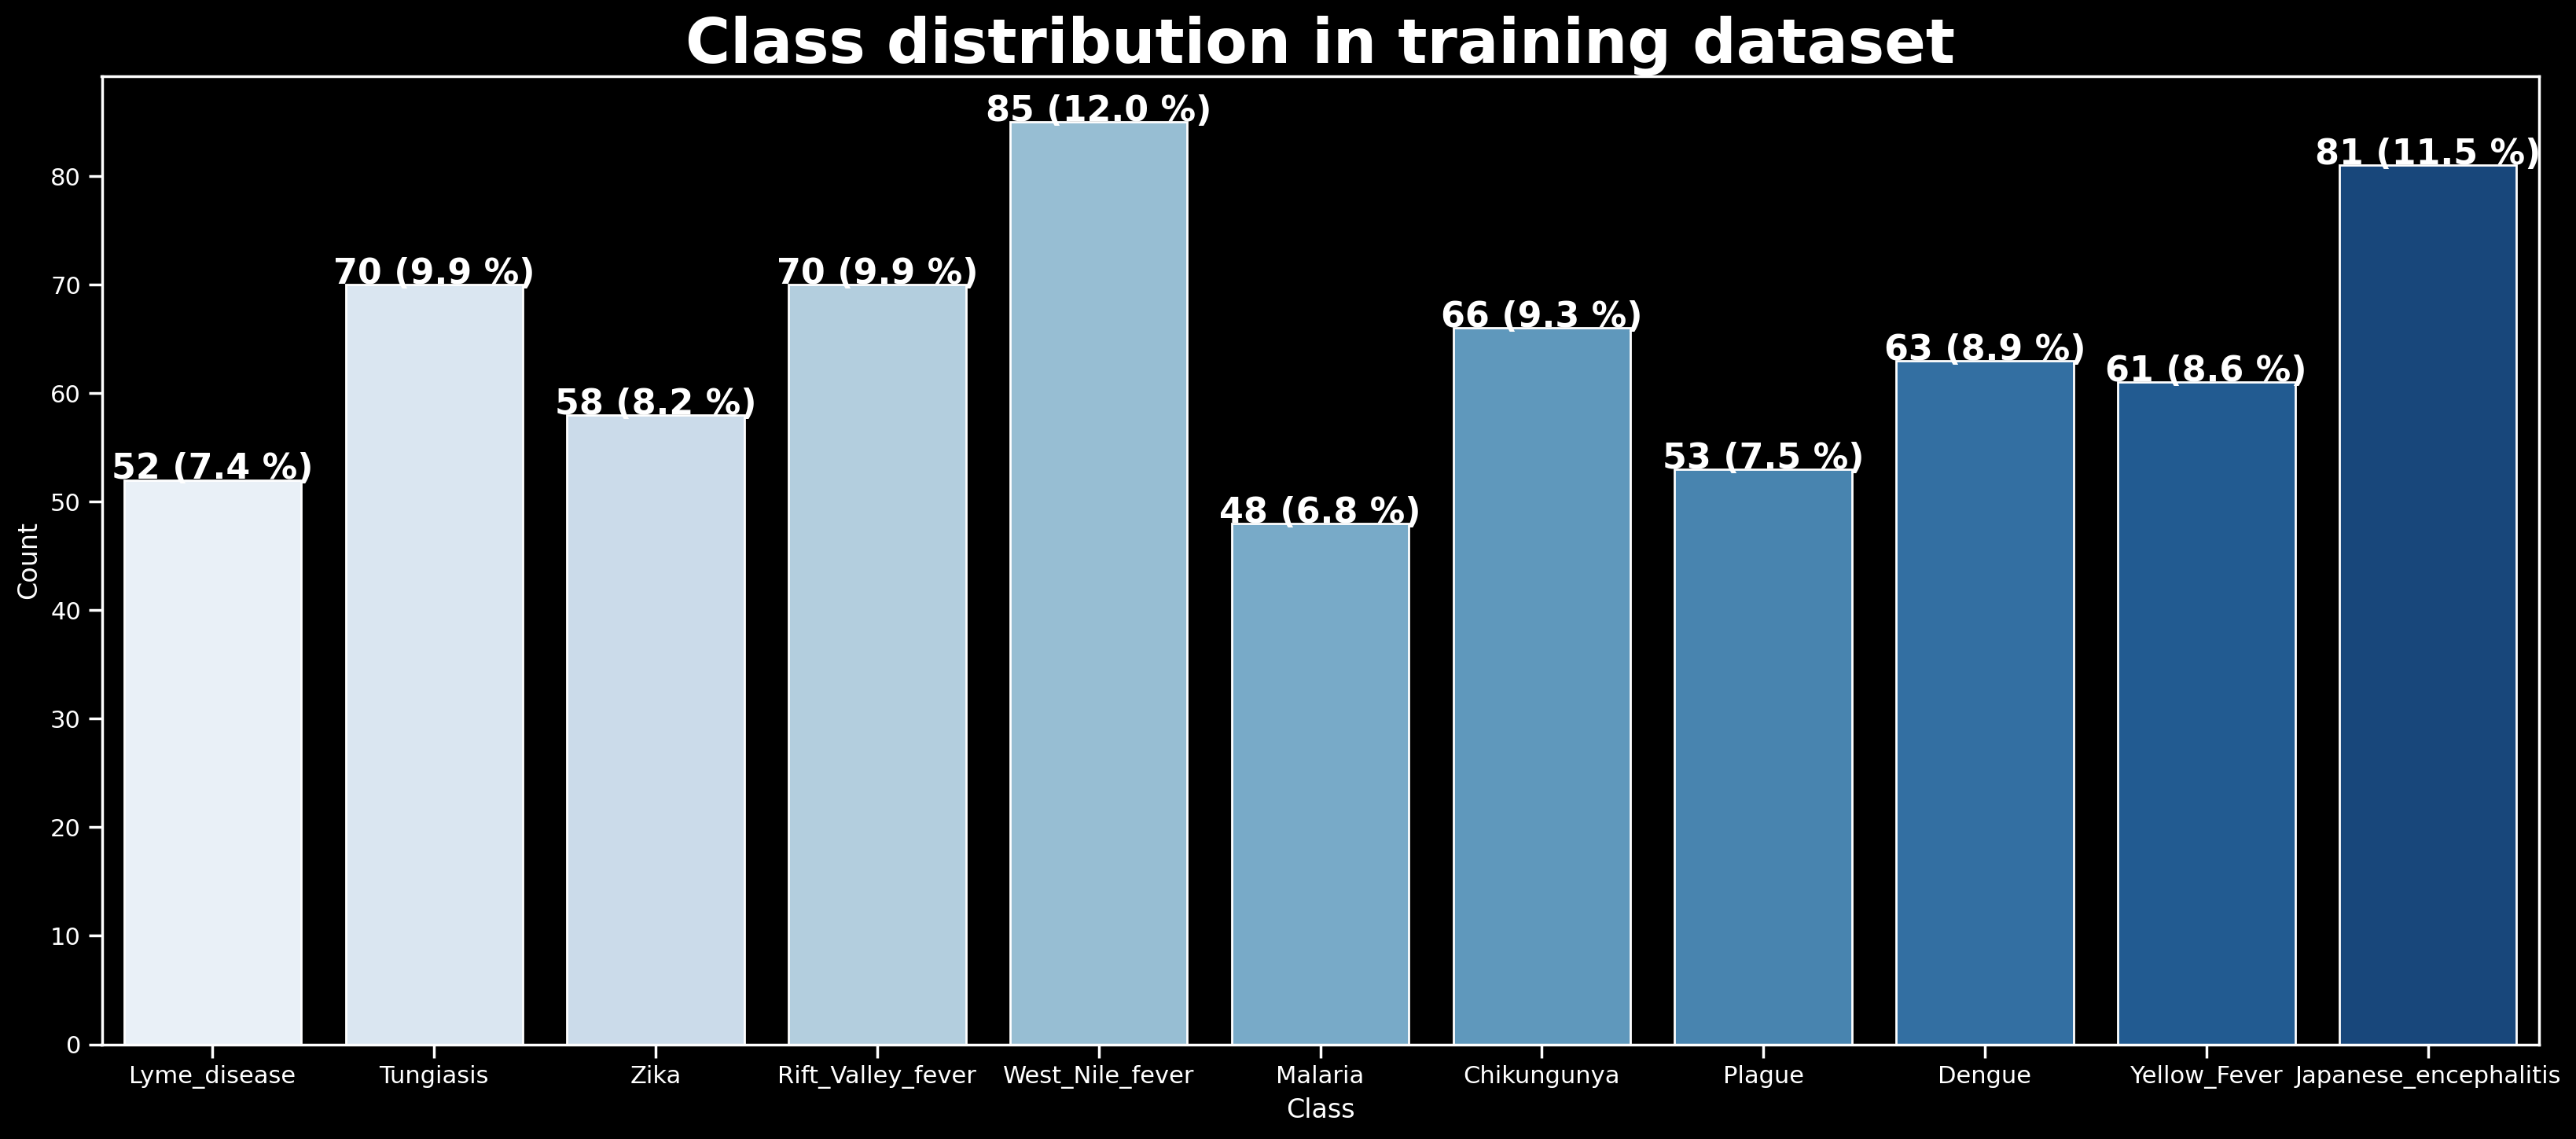

In [10]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="prognosis",
                   edgecolor="white",
                   data=df_train,
                   palette="Blues")
plt.title('Class distribution in training dataset',
          fontdict={
              'fontsize': 28,
              'color': 'white',
              'fontweight': 'bold'
          })
plt.xlabel("Class")
plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f') + " (" +
                str(round(
                    ((p.get_height() / df_train.shape[0]) * 100), 1)) + " %)",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

<Figure size 2000x800 with 0 Axes>

Text(0.5, 1.0, 'Class distribution in original dataset')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Count')

Text(0, 5, '23 (3.3 %)')

Text(0, 5, '23 (3.3 %)')

Text(0, 5, '23 (3.3 %)')

Text(0, 5, '23 (3.3 %)')

Text(0, 5, '23 (3.3 %)')

Text(0, 5, '23 (3.3 %)')

Text(0, 5, '23 (3.3 %)')

Text(0, 5, '23 (3.3 %)')

Text(0, 5, '23 (3.3 %)')

Text(0, 5, '23 (3.3 %)')

Text(0, 5, '22 (3.1 %)')

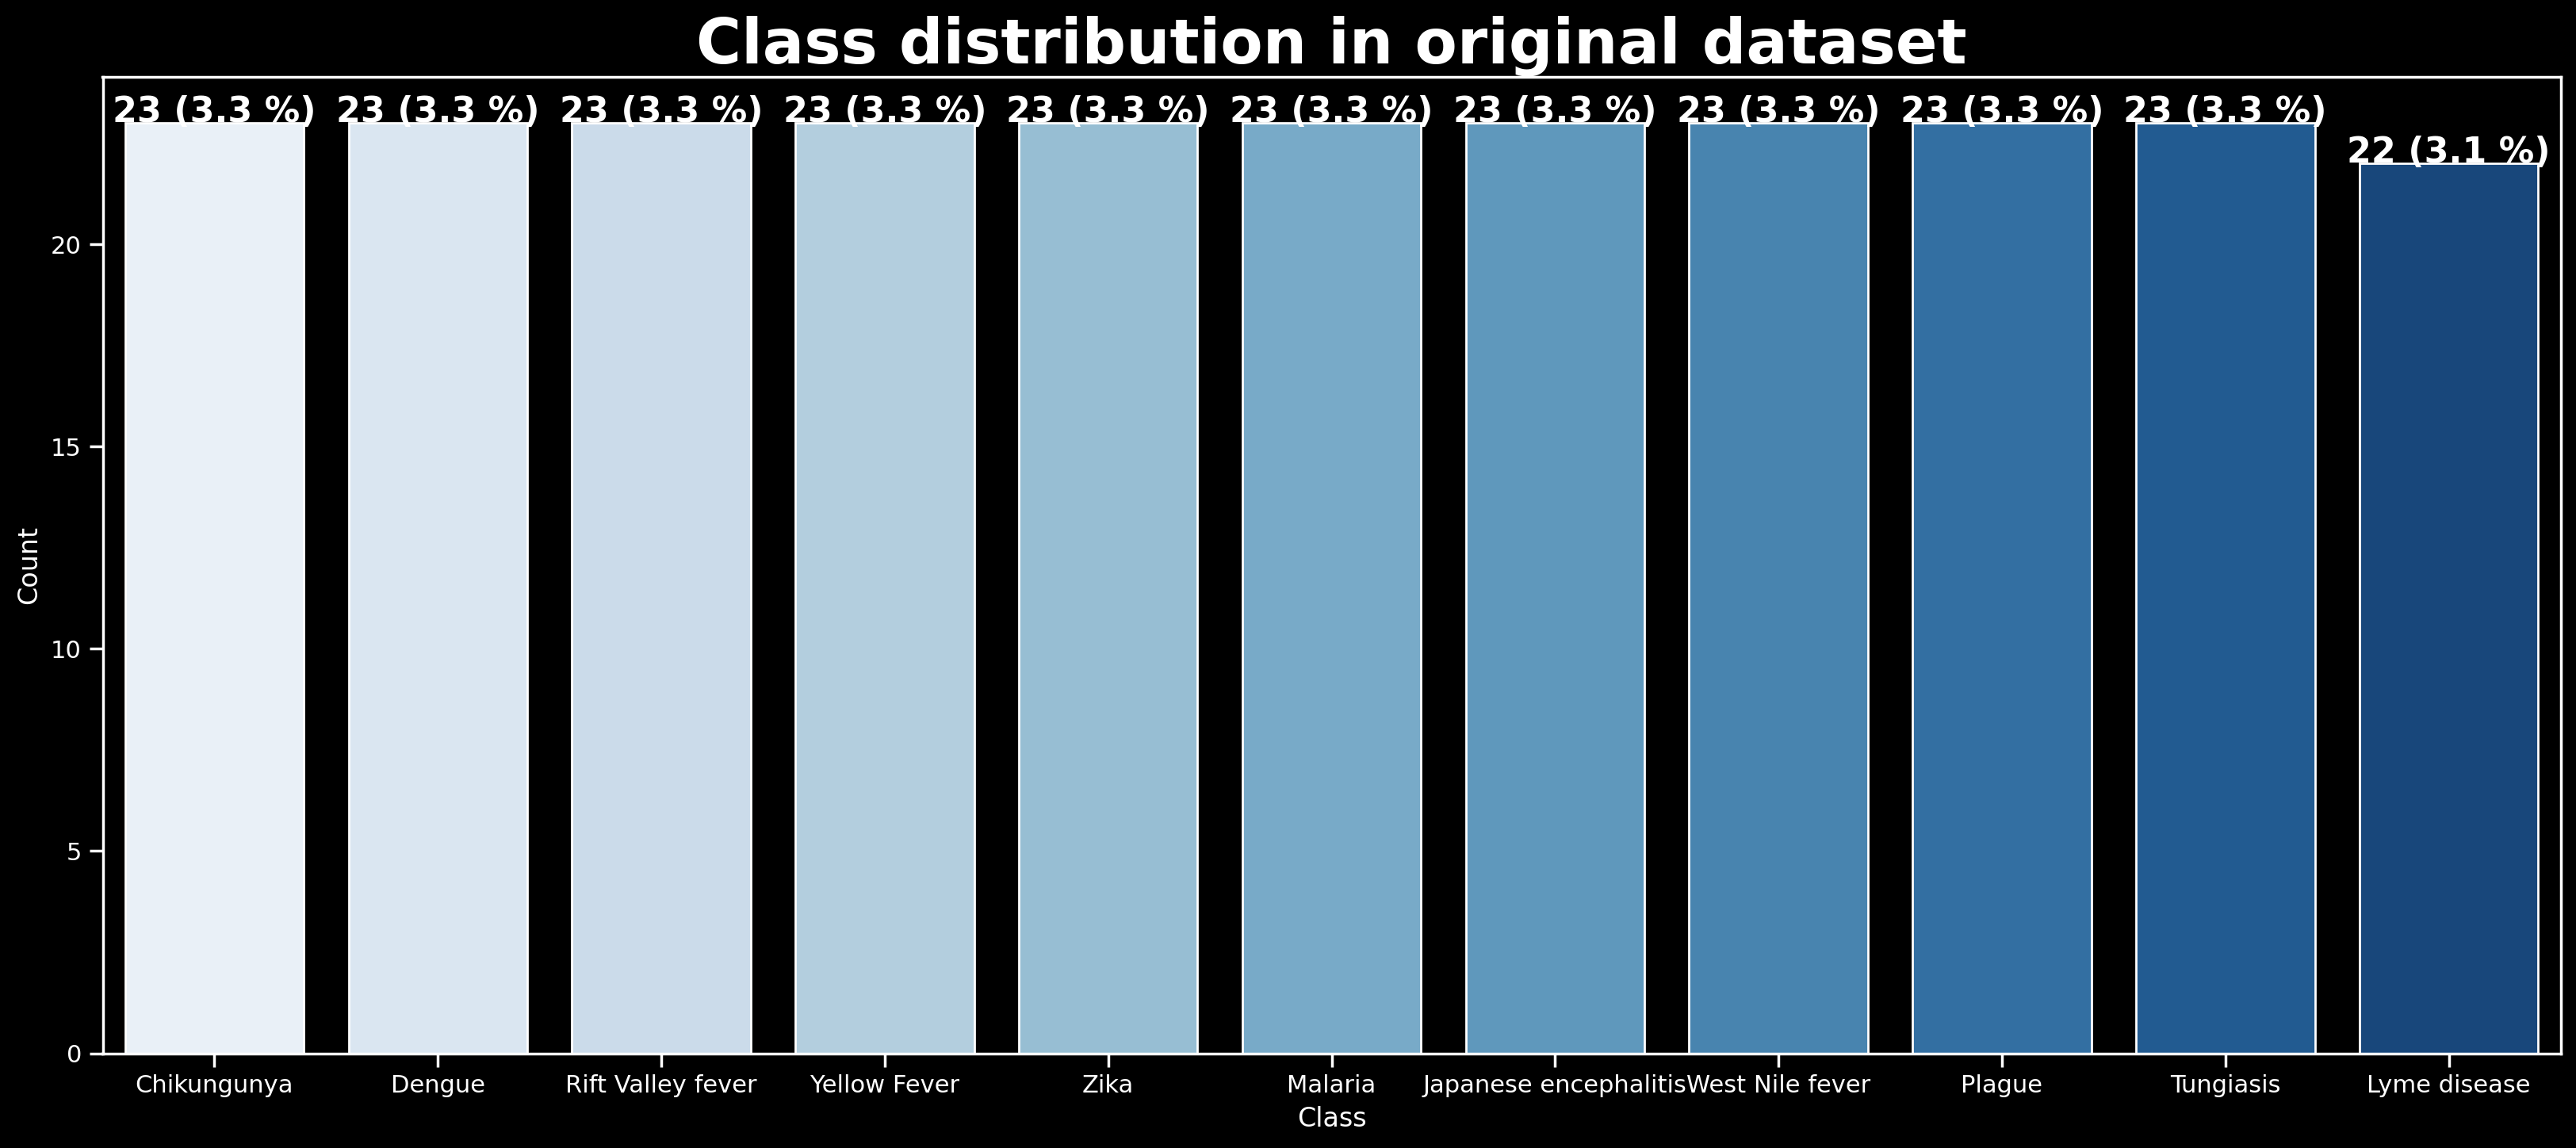

In [11]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="prognosis",
                   edgecolor="white",
                   data=df_original_train,
                   palette="Blues")
plt.title('Class distribution in original dataset',
          fontdict={
              'fontsize': 28,
              'color': 'white',
              'fontweight': 'bold'
          })
plt.xlabel("Class")
plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f') + " (" +
                str(round(
                    ((p.get_height() / df_train.shape[0]) * 100), 1)) + " %)",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

<Figure size 2000x800 with 0 Axes>

Text(0.5, 1.0, 'Class distribution in train + original dataset')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Lyme_disease'),
  Text(1, 0, 'Tungiasis'),
  Text(2, 0, 'Zika'),
  Text(3, 0, 'Rift_Valley_fever'),
  Text(4, 0, 'West_Nile_fever'),
  Text(5, 0, 'Malaria'),
  Text(6, 0, 'Chikungunya'),
  Text(7, 0, 'Plague'),
  Text(8, 0, 'Dengue'),
  Text(9, 0, 'Yellow_Fever'),
  Text(10, 0, 'Japanese_encephalitis'),
  Text(11, 0, 'Rift Valley fever'),
  Text(12, 0, 'Yellow Fever'),
  Text(13, 0, 'Japanese encephalitis'),
  Text(14, 0, 'West Nile fever'),
  Text(15, 0, 'Lyme disease')])

Text(0, 5, '52 (7.4 %)')

Text(0, 5, '93 (13.2 %)')

Text(0, 5, '81 (11.5 %)')

Text(0, 5, '70 (9.9 %)')

Text(0, 5, '85 (12.0 %)')

Text(0, 5, '71 (10.0 %)')

Text(0, 5, '89 (12.6 %)')

Text(0, 5, '76 (10.7 %)')

Text(0, 5, '86 (12.2 %)')

Text(0, 5, '61 (8.6 %)')

Text(0, 5, '81 (11.5 %)')

Text(0, 5, '23 (3.3 %)')

Text(0, 5, '23 (3.3 %)')

Text(0, 5, '23 (3.3 %)')

Text(0, 5, '23 (3.3 %)')

Text(0, 5, '22 (3.1 %)')

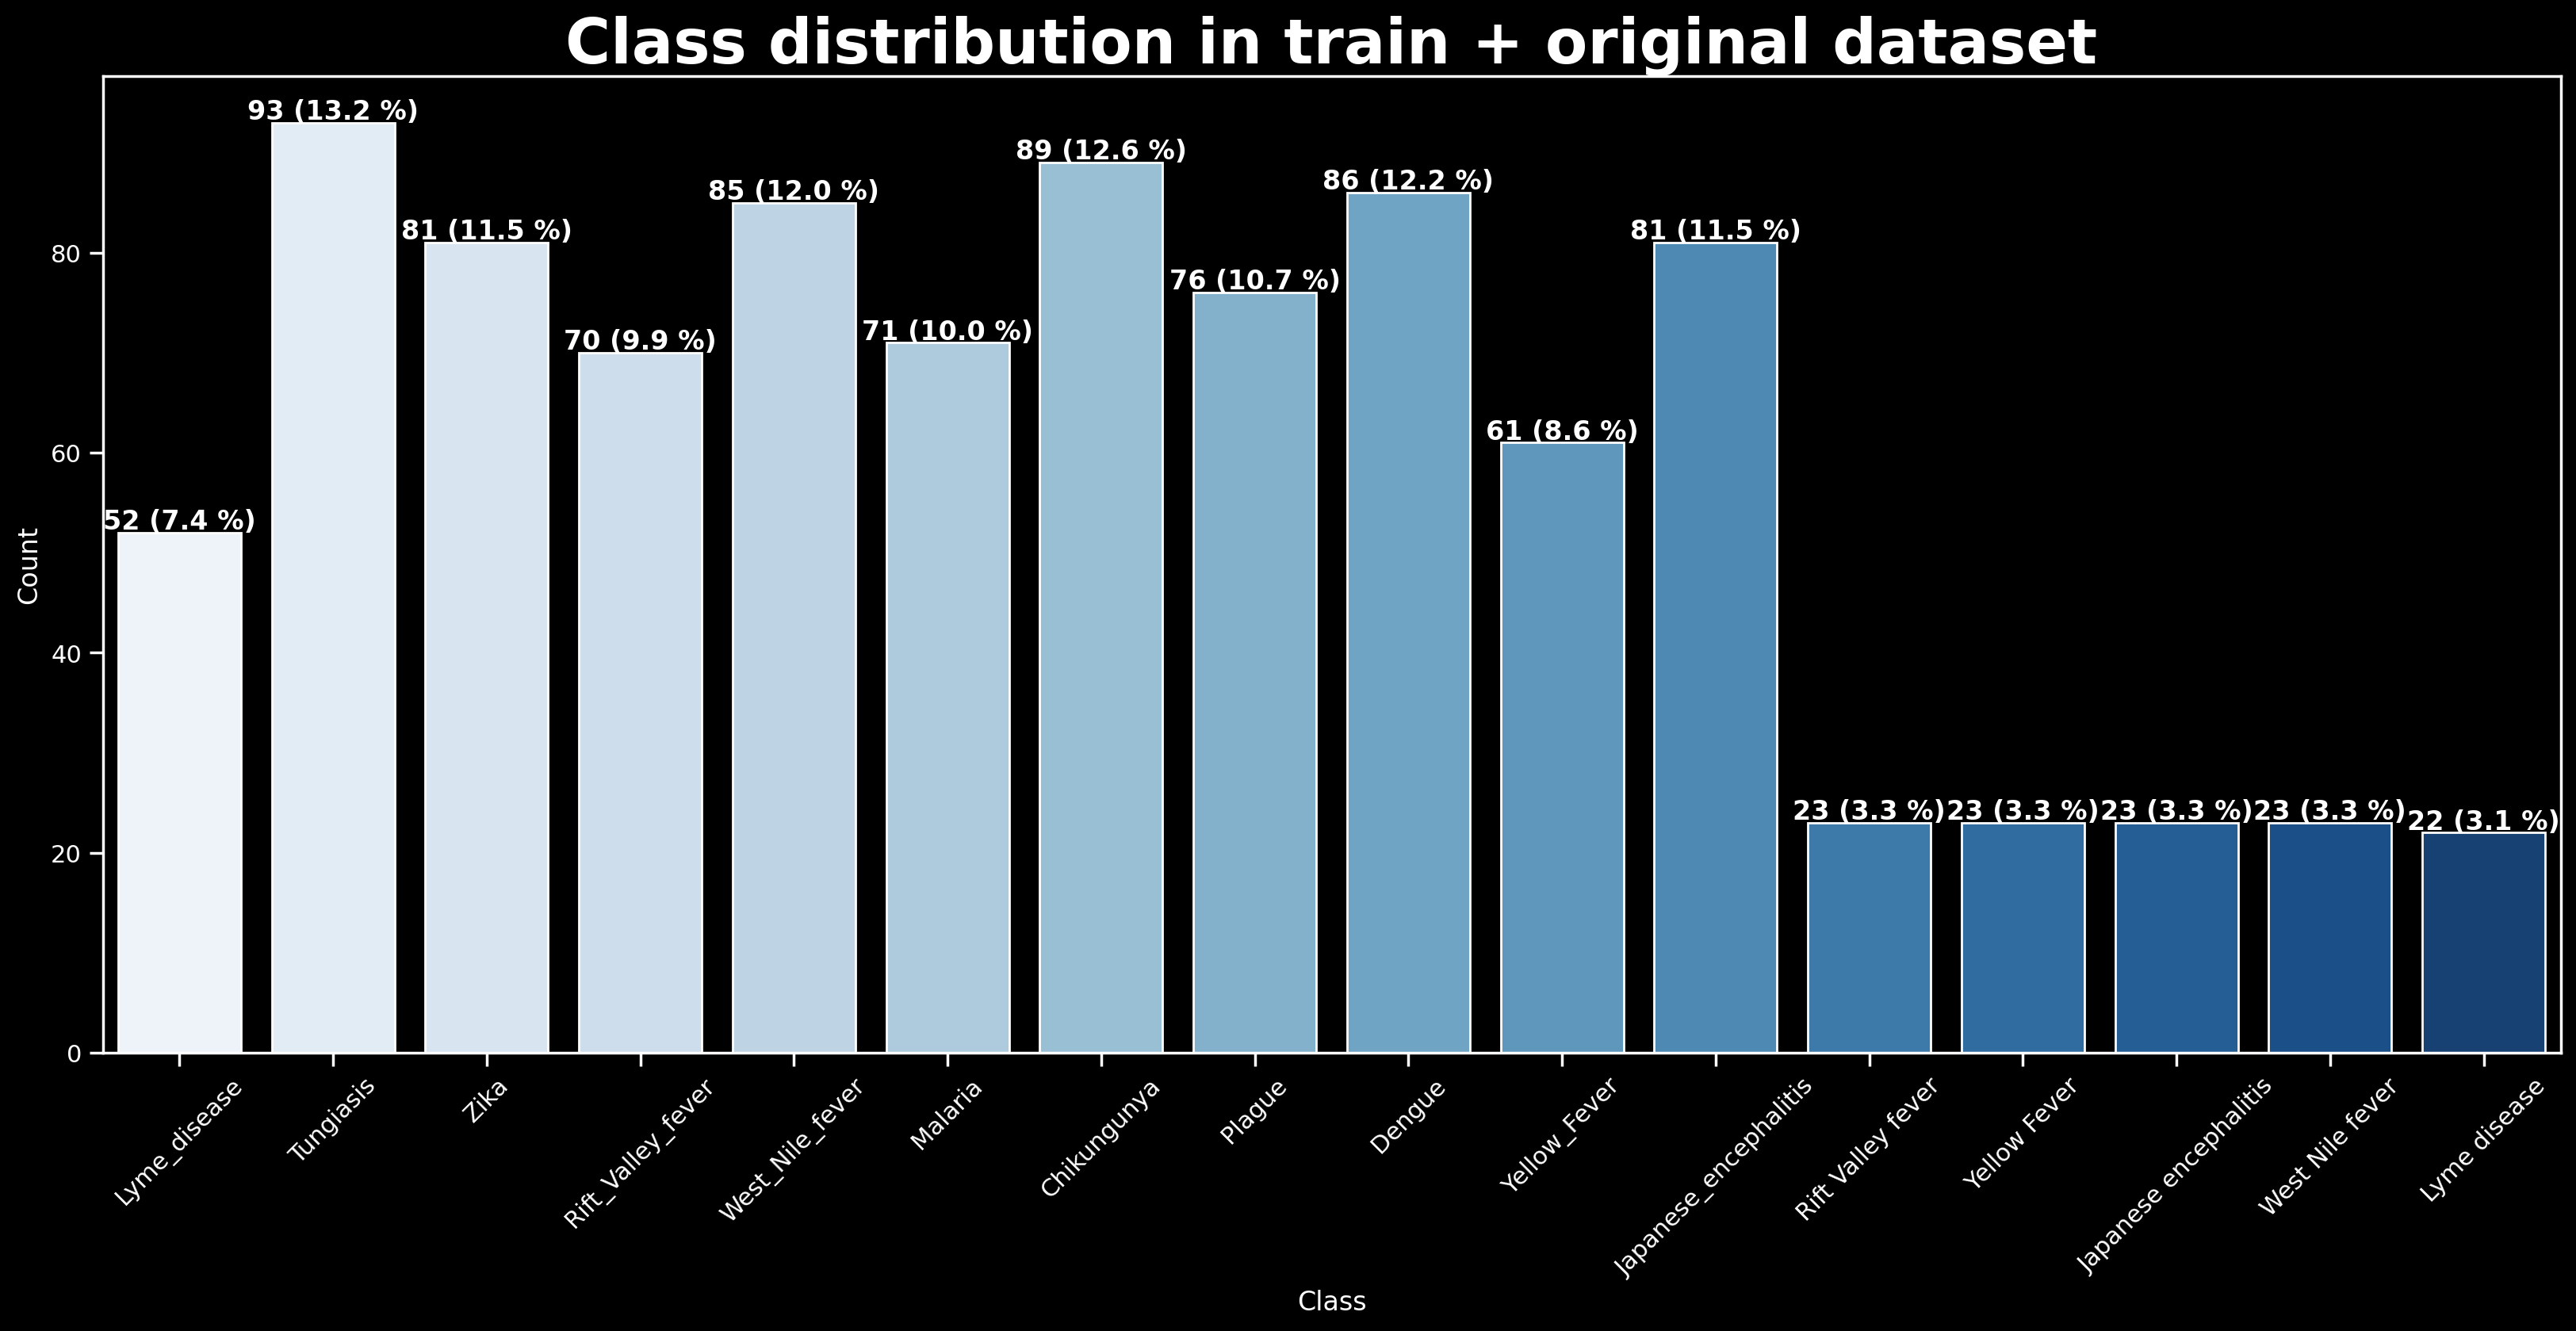

In [12]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="prognosis",
                   edgecolor="white",
                   data=df_train_original_combined,
                   palette="Blues")
plt.title('Class distribution in train + original dataset',
          fontdict={
              'fontsize': 28,
              'color': 'white',
              'fontweight': 'bold'
          })
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f') + " (" +
                str(round(
                    ((p.get_height() / df_train.shape[0]) * 100), 1)) + " %)",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                fontsize=12,
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

- #### We see duplicates in class (spaces vs underscores)
- #### This is mentioned in,
    - Note that in the original dataset some prognoses contain spaces, but in the competition dataset spaces have been replaced with underscores to work with the MPA@K metric.
    - https://www.kaggle.com/competitions/playground-series-s3e13/data?select=train.csv

In [13]:
sorted(df_train['prognosis'].unique()) # Underscore is present
sorted(df_original_train['prognosis'].unique()) # Space is present
sorted(df_train_original_combined['prognosis'].unique())

['Chikungunya',
 'Dengue',
 'Japanese_encephalitis',
 'Lyme_disease',
 'Malaria',
 'Plague',
 'Rift_Valley_fever',
 'Tungiasis',
 'West_Nile_fever',
 'Yellow_Fever',
 'Zika']

['Chikungunya',
 'Dengue',
 'Japanese encephalitis',
 'Lyme disease',
 'Malaria',
 'Plague',
 'Rift Valley fever',
 'Tungiasis',
 'West Nile fever',
 'Yellow Fever',
 'Zika']

['Chikungunya',
 'Dengue',
 'Japanese encephalitis',
 'Japanese_encephalitis',
 'Lyme disease',
 'Lyme_disease',
 'Malaria',
 'Plague',
 'Rift Valley fever',
 'Rift_Valley_fever',
 'Tungiasis',
 'West Nile fever',
 'West_Nile_fever',
 'Yellow Fever',
 'Yellow_Fever',
 'Zika']

In [14]:
# Let us replace spaces with underscores to work with MPA@K metric

In [15]:
df_original_train['prognosis'] = df_original_train['prognosis'].apply(lambda x : x.replace(' ','_'))

In [16]:
df_train_original_combined['prognosis'] = df_train_original_combined['prognosis'].apply(lambda x : x.replace(' ','_'))

In [17]:
sorted(df_train['prognosis'].unique()) # Underscore is present
sorted(df_original_train['prognosis'].unique()) # Space is removed
sorted(df_train_original_combined['prognosis'].unique())

['Chikungunya',
 'Dengue',
 'Japanese_encephalitis',
 'Lyme_disease',
 'Malaria',
 'Plague',
 'Rift_Valley_fever',
 'Tungiasis',
 'West_Nile_fever',
 'Yellow_Fever',
 'Zika']

['Chikungunya',
 'Dengue',
 'Japanese_encephalitis',
 'Lyme_disease',
 'Malaria',
 'Plague',
 'Rift_Valley_fever',
 'Tungiasis',
 'West_Nile_fever',
 'Yellow_Fever',
 'Zika']

['Chikungunya',
 'Dengue',
 'Japanese_encephalitis',
 'Lyme_disease',
 'Malaria',
 'Plague',
 'Rift_Valley_fever',
 'Tungiasis',
 'West_Nile_fever',
 'Yellow_Fever',
 'Zika']

#### Visualize again

<Figure size 2000x800 with 0 Axes>

Text(0.5, 1.0, 'Class distribution in train + original dataset')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Lyme_disease'),
  Text(1, 0, 'Tungiasis'),
  Text(2, 0, 'Zika'),
  Text(3, 0, 'Rift_Valley_fever'),
  Text(4, 0, 'West_Nile_fever'),
  Text(5, 0, 'Malaria'),
  Text(6, 0, 'Chikungunya'),
  Text(7, 0, 'Plague'),
  Text(8, 0, 'Dengue'),
  Text(9, 0, 'Yellow_Fever'),
  Text(10, 0, 'Japanese_encephalitis')])

Text(0, 5, '74 (10.5 %)')

Text(0, 5, '93 (13.2 %)')

Text(0, 5, '81 (11.5 %)')

Text(0, 5, '93 (13.2 %)')

Text(0, 5, '108 (15.3 %)')

Text(0, 5, '71 (10.0 %)')

Text(0, 5, '89 (12.6 %)')

Text(0, 5, '76 (10.7 %)')

Text(0, 5, '86 (12.2 %)')

Text(0, 5, '84 (11.9 %)')

Text(0, 5, '104 (14.7 %)')

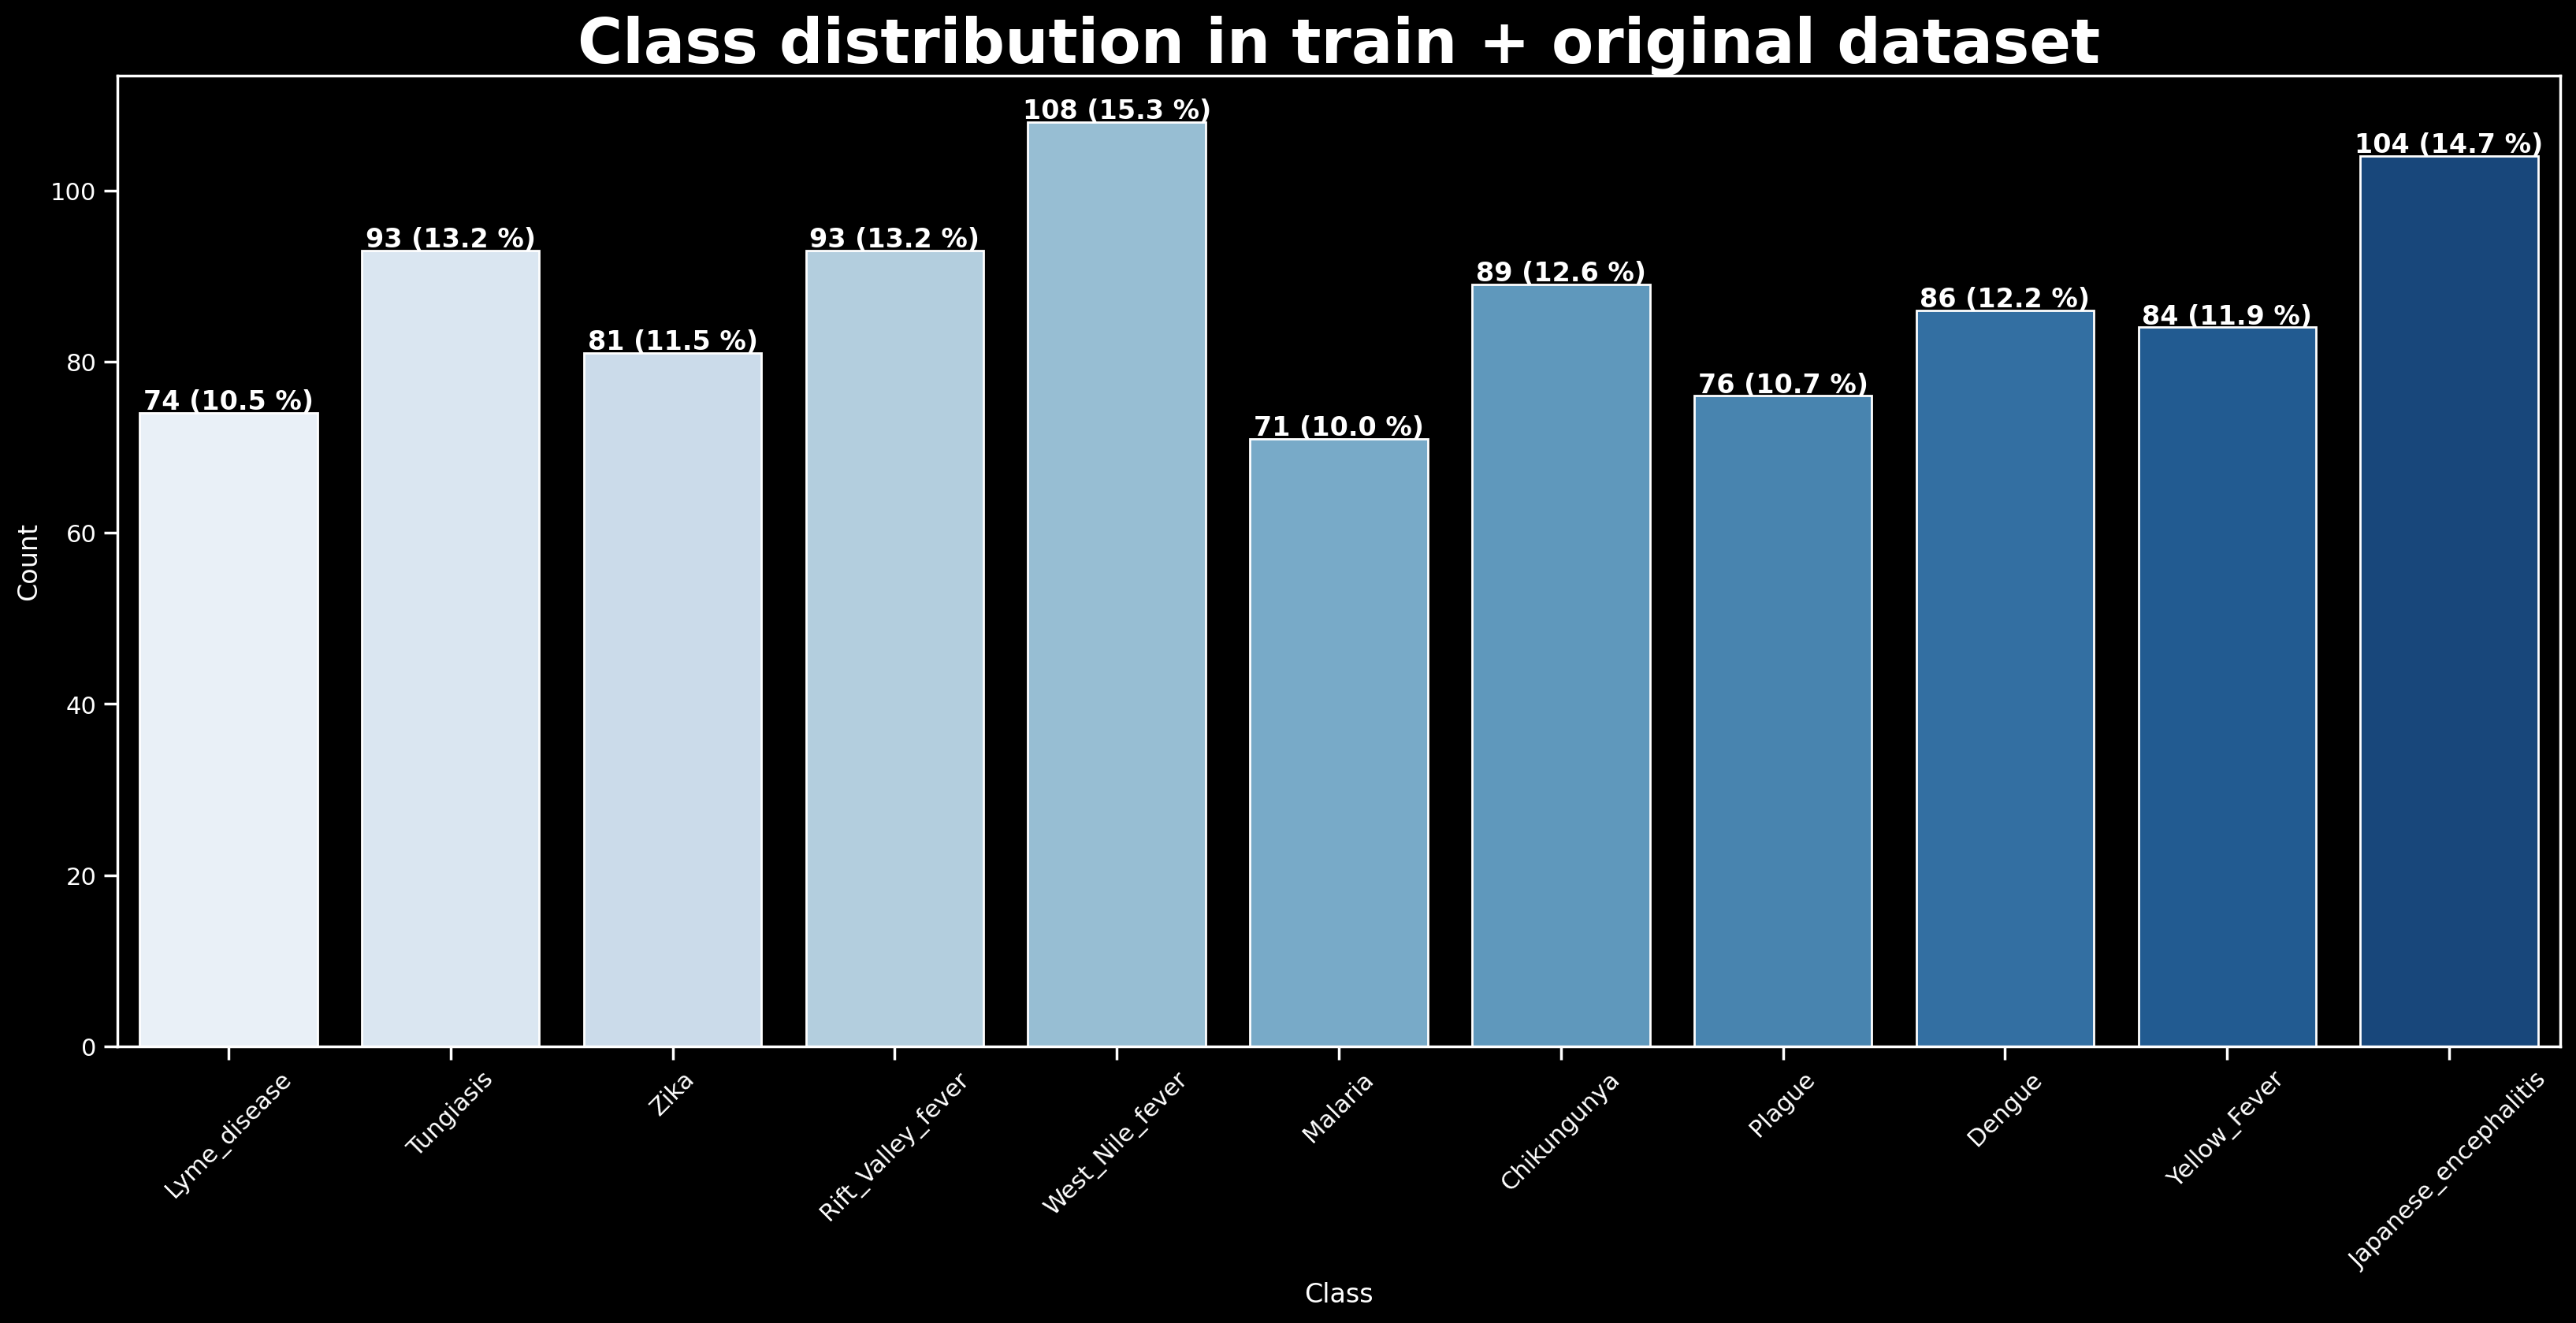

In [18]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="prognosis",
                   edgecolor="white",
                   data=df_train_original_combined,
                   palette="Blues")
plt.title('Class distribution in train + original dataset',
          fontdict={
              'fontsize': 28,
              'color': 'white',
              'fontweight': 'bold'
          })
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f') + " (" +
                str(round(
                    ((p.get_height() / df_train.shape[0]) * 100), 1)) + " %)",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                fontsize=12,
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

## 1.3 Duplicate and NaNs

In [19]:
cols = []
duplicate_values = []
duplicate_pct = []
nan_values = []
nan_pct = []

for i in df_train.columns:
    cols.append(i)
    nan_values.append(df_train[i].isnull().sum())
    nan_pct.append(
        round(((df_train[i].isnull().sum()) / df_train.shape[0]) * 100, 2))

    duplicate_values.append(df_train[i].duplicated().sum())
    duplicate_pct.append(
        round(((df_train[i].duplicated().sum()) / df_train.shape[0]) * 100, 2))

duplicate_and_nan_count = pd.DataFrame({
    "Column": cols,
    "Duplicate values": duplicate_values,
    "Duplicate %": duplicate_pct,
    "NaN values": nan_values,
    "NaN %": nan_pct
})
duplicate_and_nan_count

,Column,Duplicate values,Duplicate %,NaN values,NaN %
0,id,0,0.00,0,0.0
1,sudden_fever,705,99.72,0,0.0
2,headache,705,99.72,0,0.0
3,mouth_bleed,705,99.72,0,0.0
4,nose_bleed,705,99.72,0,0.0
...,...,...,...,...,...
61,ulcers,705,99.72,0,0.0
62,toenail_loss,705,99.72,0,0.0
63,speech_problem,705,99.72,0,0.0
64,bullseye_rash,705,99.72,0,0.0


- #### We dont have any NaNs in any of the columns.

## 1.5 Number of unique values column-wise

In [20]:
# Train
column_unique_train = dict()
for i in df_train.columns:
    column_unique_train[i] = df_train[i].nunique()
column_unique_train = pd.Series(column_unique_train)
column_unique_train

# Test
column_unique_test = dict()
for i in df_test.columns:
    column_unique_test[i] = df_test[i].nunique()
column_unique_test = pd.Series(column_unique_test)
column_unique_test

# Original
column_unique_orignial = dict()
for i in df_original_train.columns:
    column_unique_orignial[i] = df_original_train[i].nunique()
column_unique_orignial = pd.Series(column_unique_orignial)
column_unique_orignial

# Train + Original
column_unique_train_original = dict()
for i in df_train_original_combined.columns:
    column_unique_train_original[i] = df_train_original_combined[i].nunique()
column_unique_train_original = pd.Series(column_unique_train_original)
column_unique_train_original

id                707
sudden_fever        2
headache            2
mouth_bleed         2
nose_bleed          2
                 ... 
ulcers              2
toenail_loss        2
speech_problem      2
bullseye_rash       2
prognosis          11
Length: 66, dtype: int64

id                303
sudden_fever        2
headache            2
mouth_bleed         2
nose_bleed          2
                 ... 
itchiness           2
ulcers              2
toenail_loss        2
speech_problem      2
bullseye_rash       2
Length: 65, dtype: int64

sudden_fever       2
headache           2
mouth_bleed        2
nose_bleed         2
muscle_pain        2
                  ..
ulcers             2
toenail_loss       2
speech_problem     2
bullseye_rash      2
prognosis         11
Length: 65, dtype: int64

id                707
sudden_fever        2
headache            2
mouth_bleed         2
nose_bleed          2
                 ... 
ulcers              2
toenail_loss        2
speech_problem      2
bullseye_rash       2
prognosis          11
Length: 66, dtype: int64

- #### All of the features are boolean
- #### Our target is 11 class. So, it is a 11-class classification problem

In [21]:
# Dropping id

df_train.drop(columns = ['id'], axis = 1, inplace = True)

# 2. Distributions

- #### Since all are boolean columns, it is more like a categorical variable.
- #### So, use bar chart.
- #### Histogram, Violin, KDE plots won't make sense here.

<Figure size 2400x800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Unique values in training dataset column-wise')

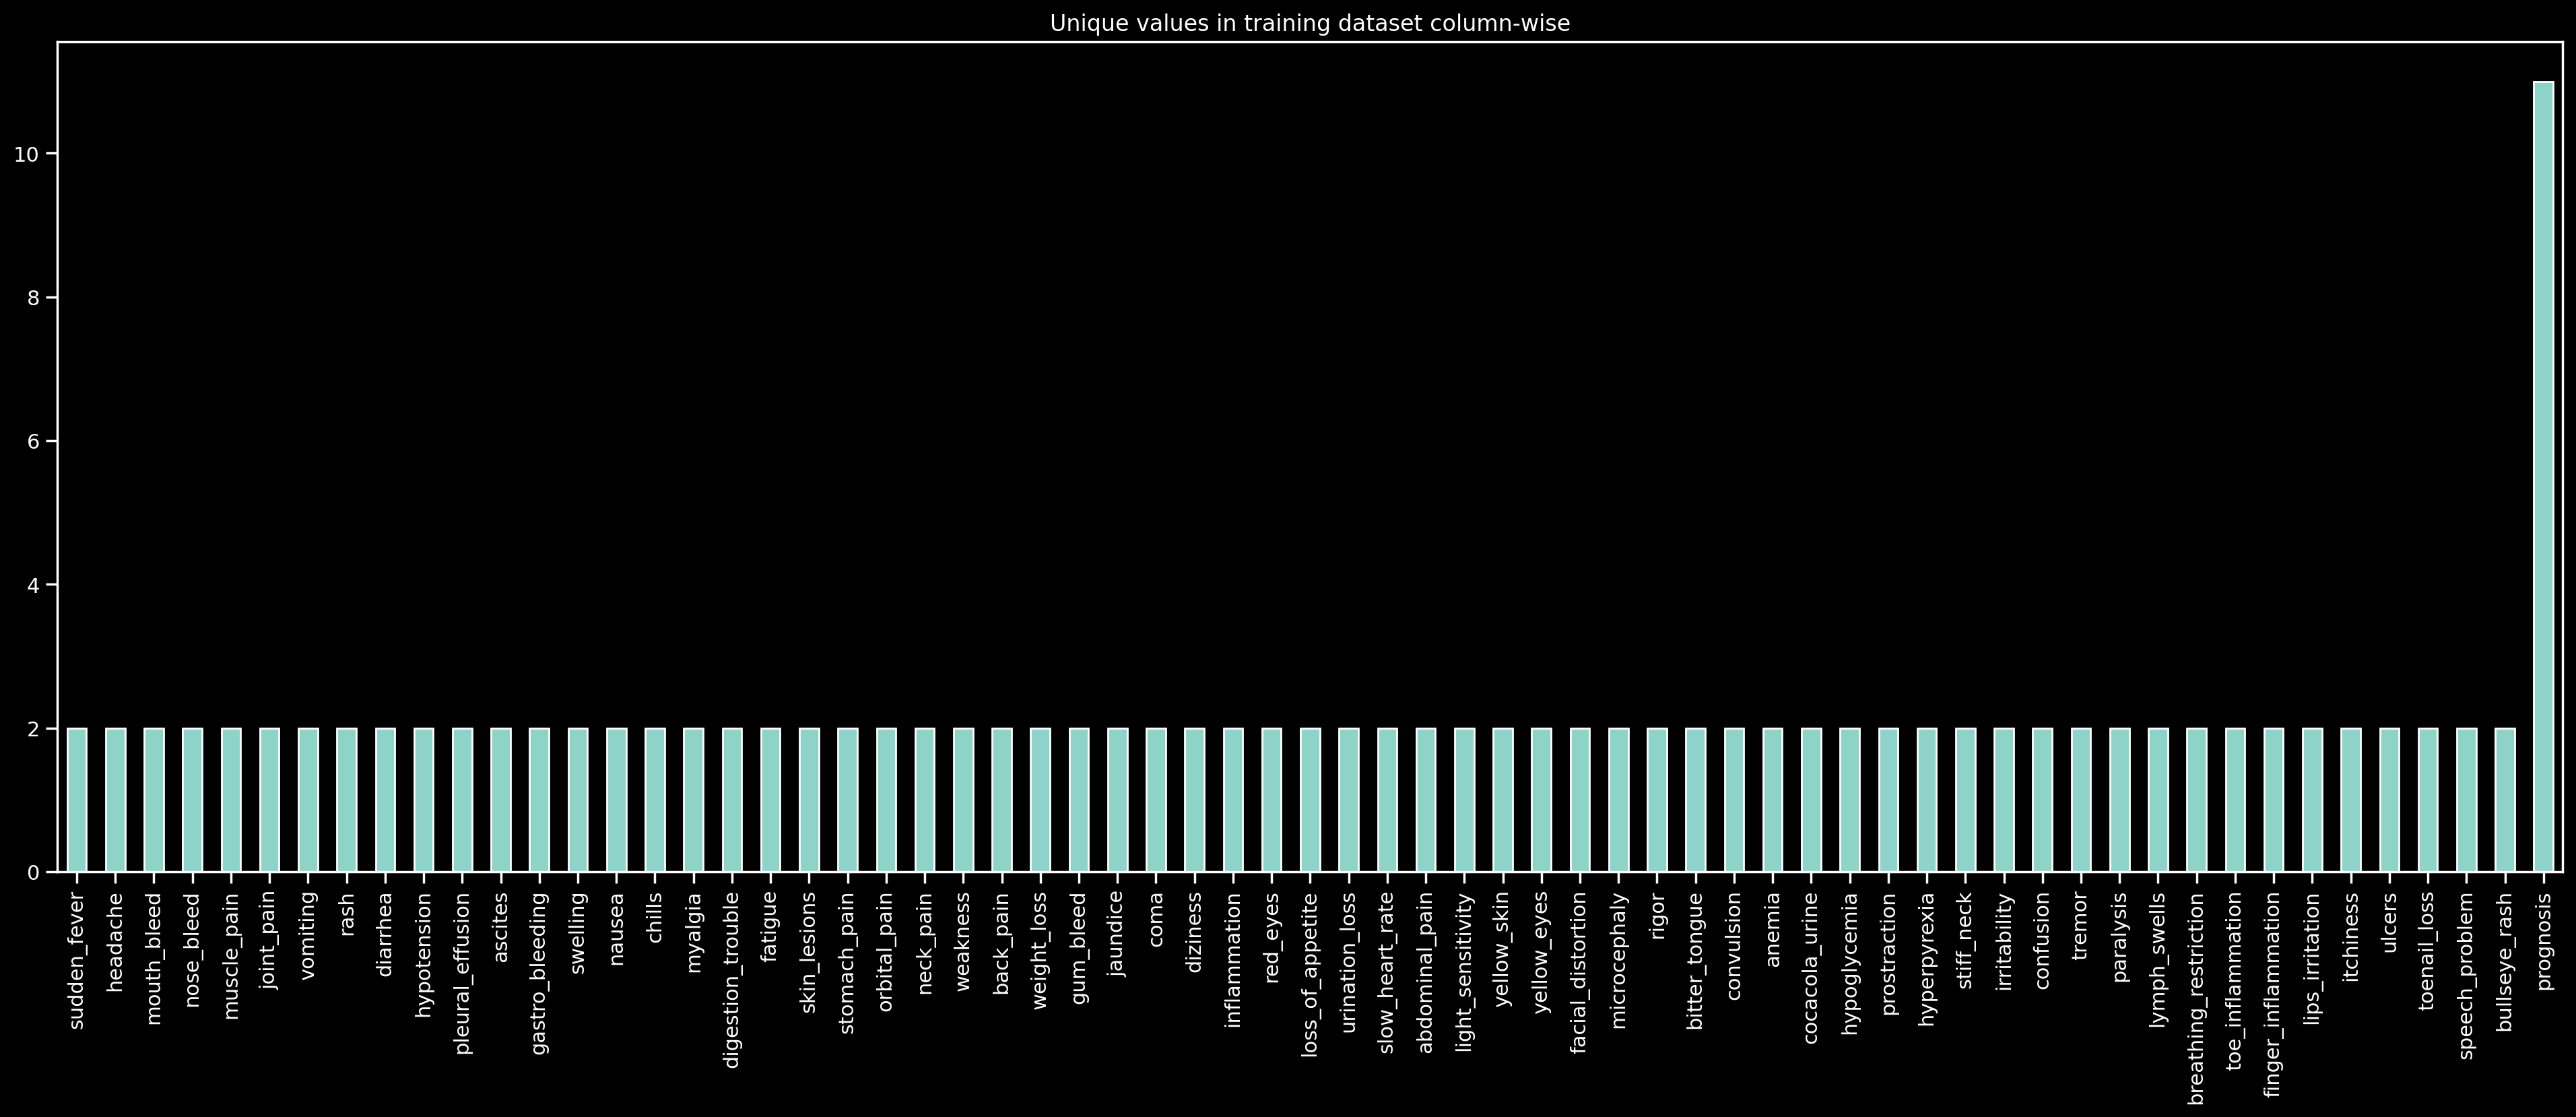

In [22]:
plt.figure(figsize=(24,8))
column_unique_train.drop(['id']).plot.bar()
plt.title('Unique values in training dataset column-wise')
# px.bar(column_unique_train.drop(['id']), title='Unique values in training dataset column-wise')

- #### We again confirm that all columns except target (prognosis) have only 2 unique values.
- #### Let us calculate Yes/No percentage for each column


<Figure size 2400x800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Unique values in test dataset column-wise')

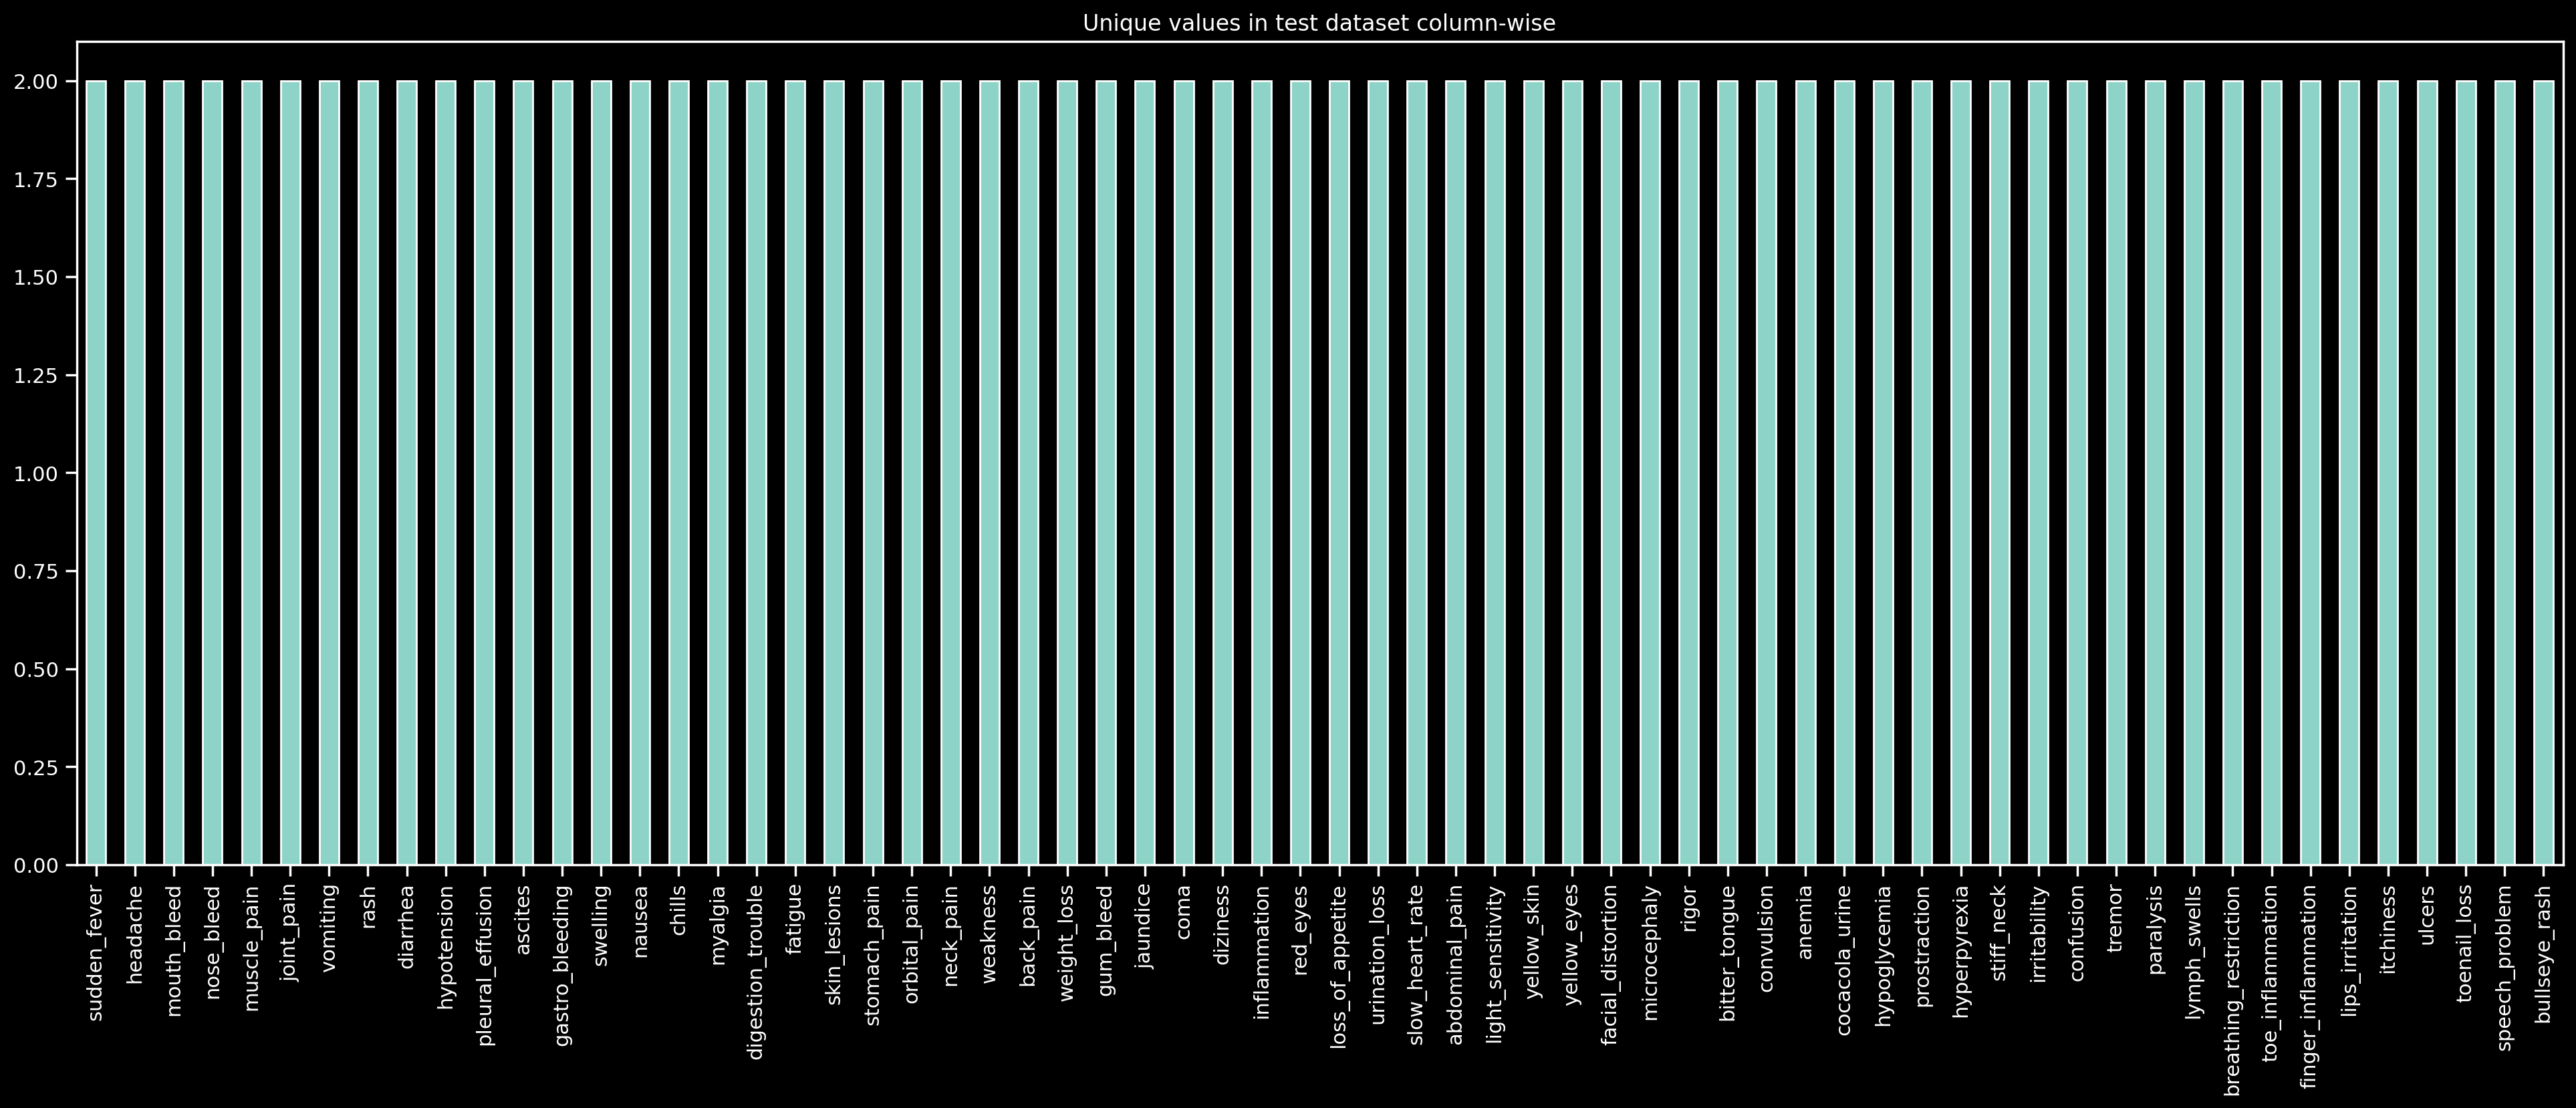

In [23]:
# px.bar(column_unique_test.drop(['id']), title='Unique values in test dataset column-wise')
plt.figure(figsize=(24,8))
column_unique_test.drop(['id']).plot.bar()
plt.title('Unique values in test dataset column-wise')

<Figure size 2400x800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Unique values in original dataset column-wise')

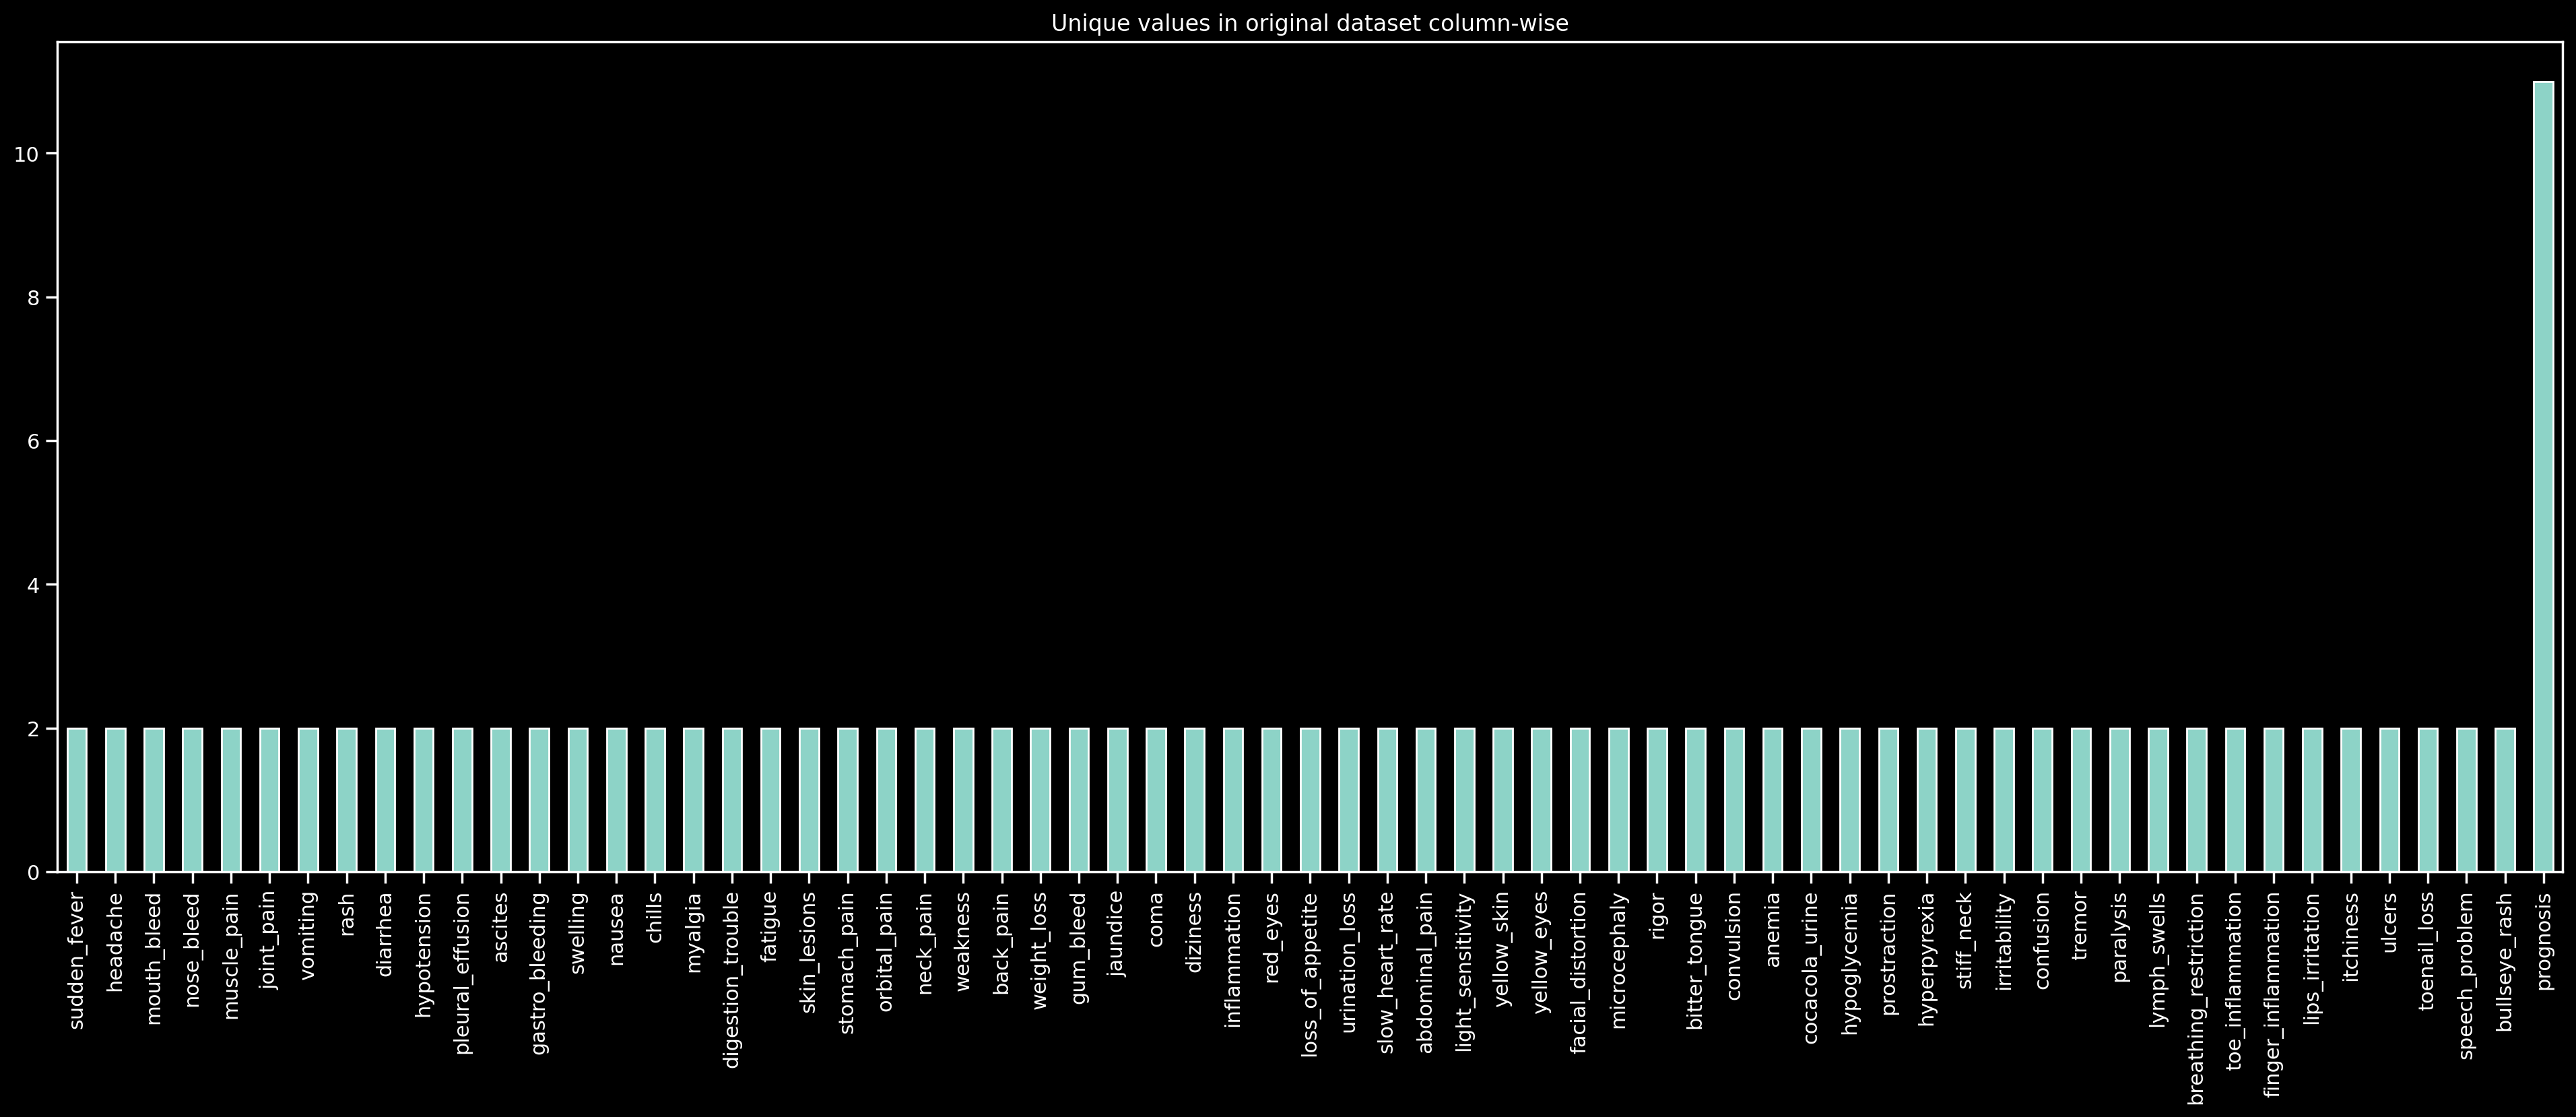

In [24]:
# px.bar(column_unique_orignial, title='Unique values in original dataset column-wise')
plt.figure(figsize=(24,8))
column_unique_orignial.plot.bar()
plt.title('Unique values in original dataset column-wise')

<Figure size 2400x800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Unique values in train + original dataset column-wise')

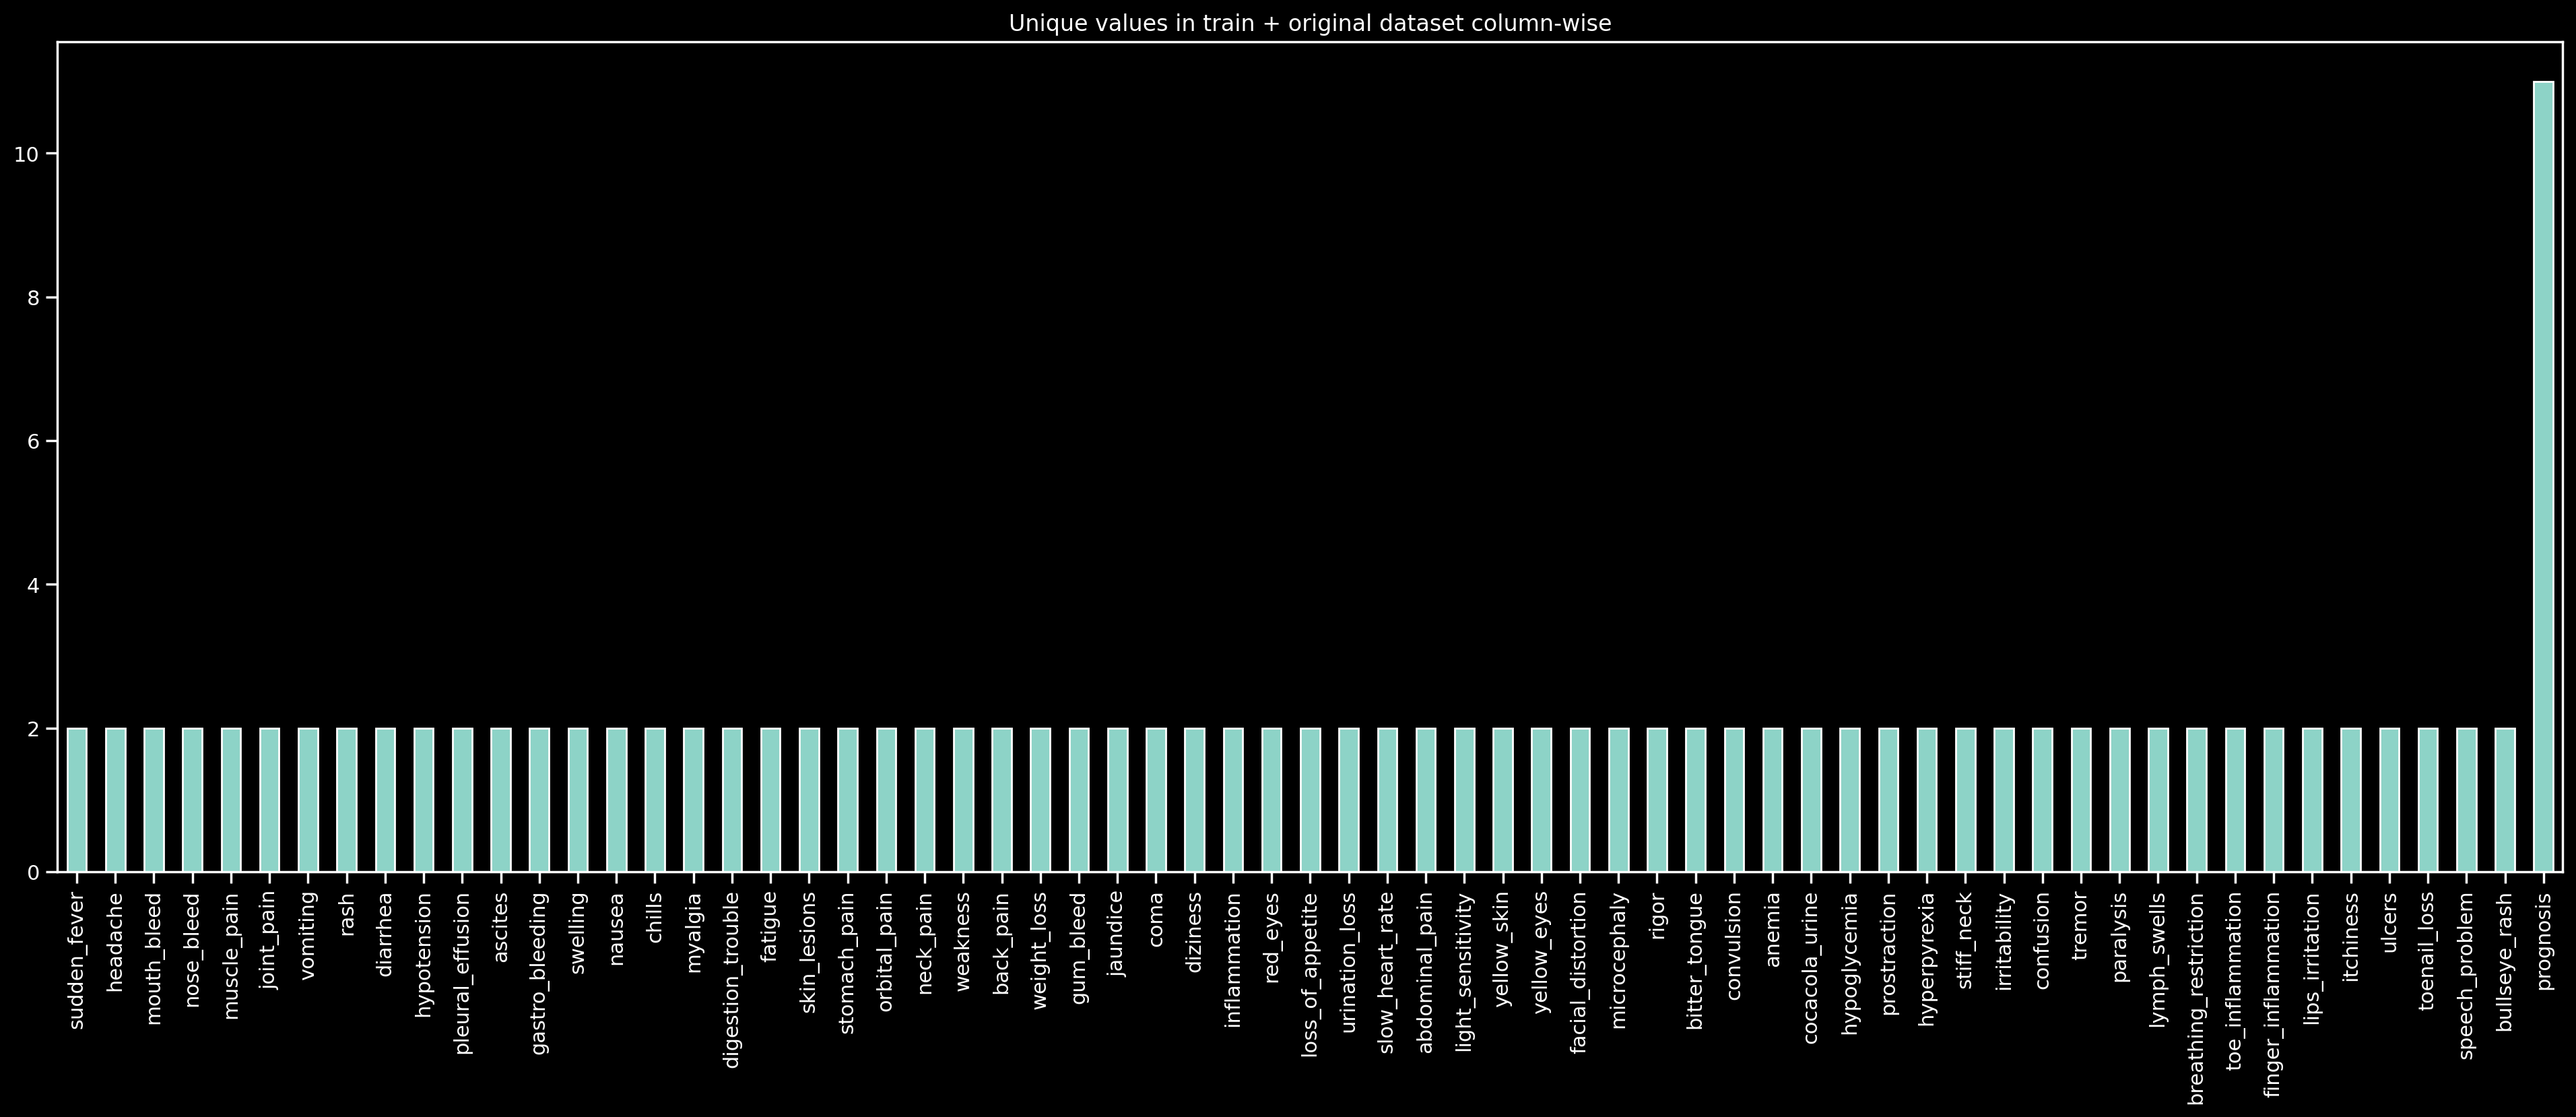

In [25]:
# px.bar(column_unique_train_original.drop(['id']), title='Unique values in train + original dataset column-wise')
plt.figure(figsize=(24,8))
column_unique_train_original.drop(['id']).plot.bar()
plt.title('Unique values in train + original dataset column-wise')

In [26]:
def calculate_yes_no_percentage(df):
    return pd.DataFrame(
        {
            'Yes':
            round((df.drop(['prognosis'], axis=1).apply(lambda x: x.sum()) /
                   df.shape[0]) * 100, 2),
            'No':
            round(
                100 -
                (df.drop(['prognosis'], axis=1).apply(lambda x: x.sum()) /
                 df.shape[0]) * 100, 2)
        },
        index=df.columns,
    )

In [27]:
yes_no_percentage_train = calculate_yes_no_percentage(df_train)
yes_no_percentage_original = calculate_yes_no_percentage(df_original_train)
yes_no_percentage_combined = calculate_yes_no_percentage(df_train_original_combined)

yes_no_percentage_test = pd.DataFrame(
        {
            'Yes':
            round((df_test.drop(['id'], axis=1).apply(lambda x: x.sum()) /
                   df_test.shape[0]) * 100, 2),
            'No':
            round(
                100 -
                (df_test.drop(['id'], axis=1).apply(lambda x: x.sum()) /
                 df_test.shape[0]) * 100, 2)
        },
        index=df_test.drop(['id'], axis=1).columns,
    )

In [28]:
yes_no_percentage_train 
yes_no_percentage_original
yes_no_percentage_combined
yes_no_percentage_test

,Yes,No
sudden_fever,50.35,49.65
headache,44.98,55.02
mouth_bleed,45.97,54.03
nose_bleed,48.80,51.20
muscle_pain,51.77,48.23
...,...,...
ulcers,14.43,85.57
toenail_loss,13.72,86.28
speech_problem,3.25,96.75
bullseye_rash,3.11,96.89


,Yes,No
sudden_fever,51.59,48.41
headache,46.03,53.97
mouth_bleed,51.98,48.02
nose_bleed,54.76,45.24
muscle_pain,51.98,48.02
...,...,...
ulcers,15.48,84.52
toenail_loss,17.06,82.94
speech_problem,11.90,88.10
bullseye_rash,12.30,87.70


,Yes,No
id,26024.09,-25924.09
sudden_fever,50.68,49.32
headache,45.26,54.74
mouth_bleed,47.55,52.45
nose_bleed,50.36,49.64
...,...,...
ulcers,14.70,85.30
toenail_loss,14.60,85.40
speech_problem,5.53,94.47
bullseye_rash,5.53,94.47


,Yes,No
sudden_fever,57.76,42.24
headache,46.20,53.80
mouth_bleed,45.87,54.13
nose_bleed,50.50,49.50
muscle_pain,53.14,46.86
...,...,...
itchiness,16.50,83.50
ulcers,12.87,87.13
toenail_loss,12.21,87.79
speech_problem,5.28,94.72


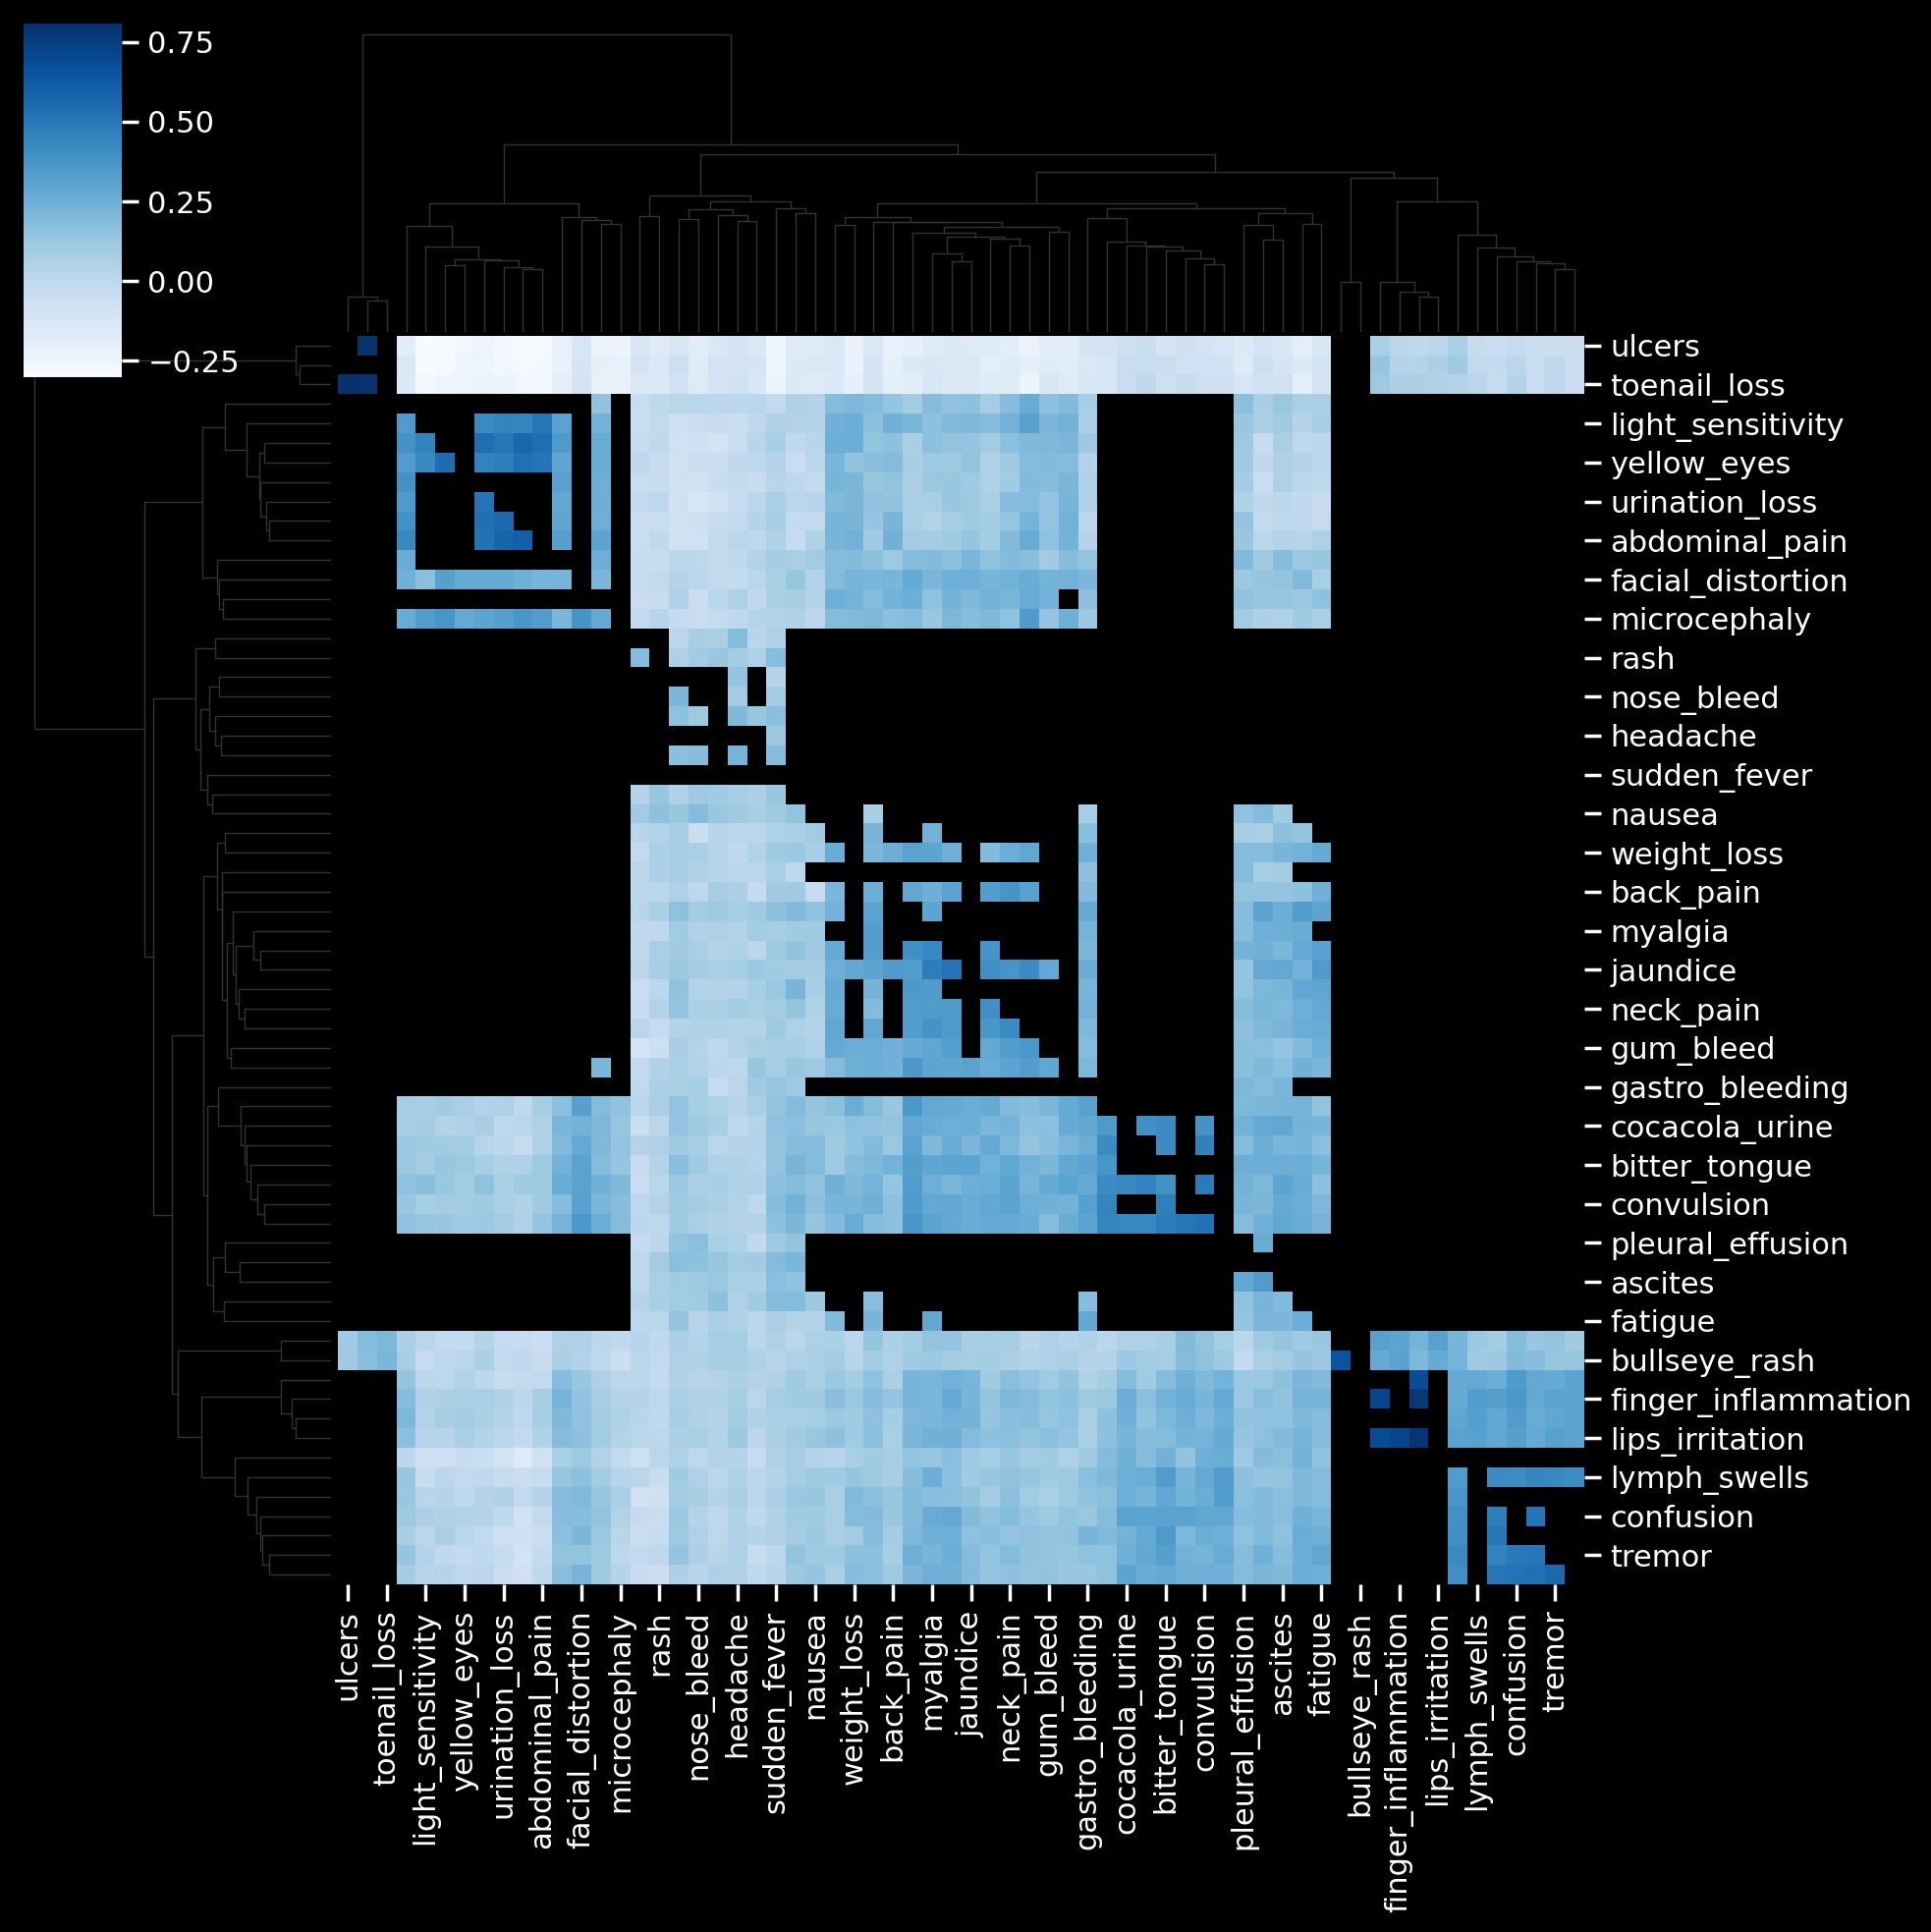

In [29]:
df_train_corr = df_train.corr()
sns.clustermap(df_train_corr, mask = np.triu(df_train_corr), cmap="Blues")

<AxesSubplot:>

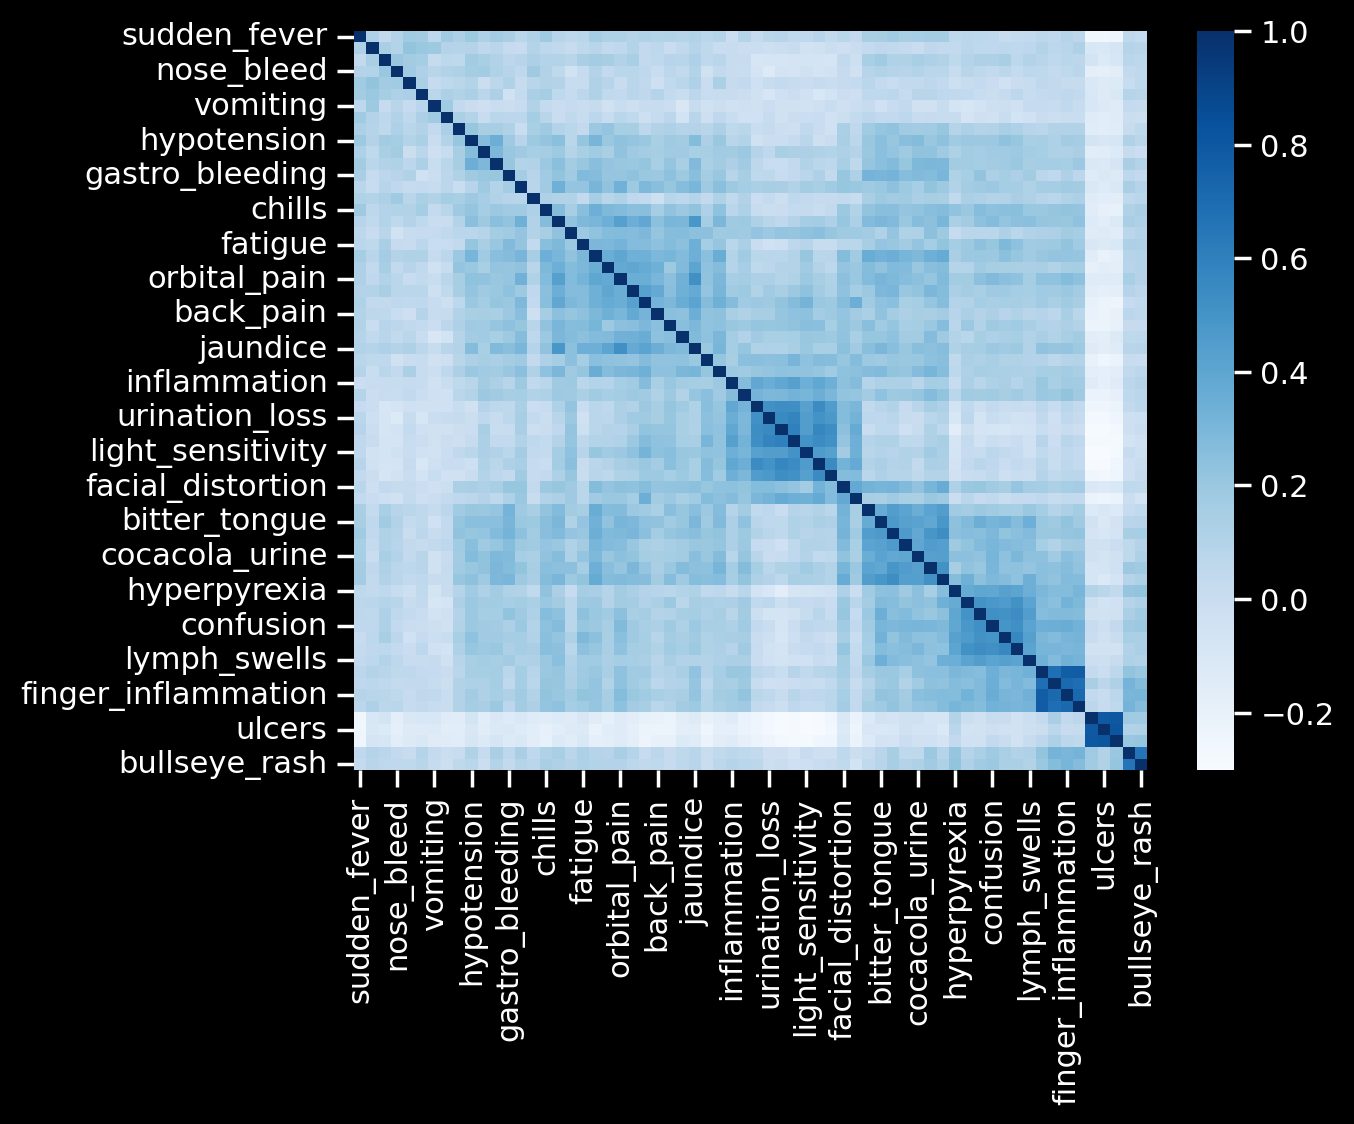

In [30]:
sns.heatmap(df_train_corr,cmap="Blues")

- #### Let us compare our train, test, original dataset's yes/no percentage.
- #### This helps us in understanding is there any bias/weightage towards yes/no.

# Modelling

In [31]:
# To be continued in next version